In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def parse_beam_numbers(test_cases):
    """
    Parse test cases and extract the last two numbers after '&' symbols.

    Args:
        test_cases (list): List of strings, each containing a test case

    Returns:
        tuple: Two lists containing the first and second numbers respectively
    """
    first_numbers = []
    second_numbers = []

    for test_case in test_cases:
        parts = [part.strip() for part in test_case.split('&')]

        if len(parts) == 3:
            first_numbers.append(int(parts[-2]))
            second_numbers.append(int(parts[-1]))

    return first_numbers, second_numbers

test_cases = [
    "+ * P 7 5 * ^ a0 P 4 * ^ a1 P 3 ^ a2 P 2 + * N 5 1 * a0 * ^ a1 P 6 ^ a2 P 2 + * P 2 1 * ^ a0 P 3 * ^ a1 P 3 ^ a2 P 3 + * P 5 1 * ^ a1 P 6 ^ a2 P 3 + * N 9 * ^ a0 P 5 ^ a2 P 4 + * N 6 0 * ^ a0 P 2 * ^ a1 P 3 ^ a2 P 4 + * N 9 * ^ a0 P 4 ^ a2 P 5 + * N 7 2 * a0 * ^ a1 P 3 ^ a2 P 5 + * P 3 6 * ^ a0 P 3 ^ a2 P 6 + * P 3 6 * ^ a1 P 3 ^ a2 P 6 * N 1 8 * ^ a0 P 2 ^ a2 P 7 & 50 & 43",
    "+ * P 5 4 * ^ a0 P 7 ^ a2 P 2 + * N 9 0 * ^ a0 P 6 * a1 ^ a2 P 2 ... & 40 & 24",
]

transformer_lc, mma_lc = parse_beam_numbers(test_cases)
print("transformer_lc:", transformer_lc)
print("mma_lc:", mma_lc)

transformer_lc: [50, 40]
mma_lc: [43, 24]


In [41]:
def read_test_cases(file_path):
    """
    Read test cases from a file, where each line is a test case.

    Args:
        file_path (str): Path to the test cases file

    Returns:
        list: List of test cases as strings
    """
    test_cases = []

    try:
        with open(file_path, 'r') as file:
            # Read each line and strip whitespace
            test_cases = [line.strip() for line in file if line.strip()]

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Error reading file: {str(e)}")

    return test_cases

def get_correct_cases(test_cases, correct_indices):
    """
    Get the test cases that were correct based on their indices.

    Args:
        test_cases (list): List of all test cases
        correct_indices (list): List of indices where the model was correct

    Returns:
        list: List of correct test cases
    """
    return [test_cases[i] for i in correct_indices]

In [42]:
def plot_overlaid_distributions(test_cases, beam_width_results, beam_width=50):
    """
    Create overlaid distribution plot for vertex counts of transformer vs Mathematica
    """
    # Get the correct cases for beam width 50
    correct_cases = get_correct_cases(test_cases, beam_width_results[beam_width])
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    # Create figure
    plt.figure(figsize=(10, 6))

    # Calculate the kernel density estimation for both distributions
    kde_transformer = stats.gaussian_kde(transformer_leafcount)
    kde_mma = stats.gaussian_kde(mma_leafcount)

    # Create evaluation points
    x_min = min(min(transformer_leafcount), min(mma_leafcount))
    x_max = max(max(transformer_leafcount), max(mma_leafcount))
    x_eval = np.linspace(x_min, x_max, 200)

    # Plot the KDE
    plt.plot(x_eval, kde_transformer(x_eval), 'b-', label='Transformer', linewidth=2)
    plt.plot(x_eval, kde_mma(x_eval), 'g-', label='Mathematica', linewidth=2)

    # Fill the area under the curves
    plt.fill_between(x_eval, kde_transformer(x_eval), alpha=0.3, color='blue')
    plt.fill_between(x_eval, kde_mma(x_eval), alpha=0.3, color='green')

    # Add vertical lines for means
    plt.axvline(np.mean(transformer_leafcount), color='blue', linestyle='--', alpha=0.5,
                label=f'Transformer Mean: {np.mean(transformer_leafcount):.2f}')
    plt.axvline(np.mean(mma_leafcount), color='green', linestyle='--', alpha=0.5,
                label=f'Mathematica Mean: {np.mean(mma_leafcount):.2f}')

    # Customize the plot
    plt.xlabel('Vertex Count')
    plt.ylabel('Density')
    plt.title(f'Distribution of Vertex Counts (Beam Width {beam_width})')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add statistics annotation
    stats_text = (f'Transformer: mean={np.mean(transformer_leafcount):.2f}, '
                 f'std={np.std(transformer_leafcount):.2f}\n'
                 f'Mathematica: mean={np.mean(mma_leafcount):.2f}, '
                 f'std={np.std(mma_leafcount):.2f}')
    plt.text(0.5, 0.95, stats_text, horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

In [43]:
def find_top_differences(input_array, correct_indices, other_array):
    def process_single_string(s):
        parts = s.split(' & ')
        if len(parts) >= 2:
            last_two = parts[-2:]
            return abs(abs(int(last_two[1])) - (int(last_two[0])))
        return 0

    differences = [
        (idx, process_single_string(input_array[idx]))
        for idx in correct_indices
    ]

    top_3 = sorted(differences, key=lambda x: x[1], reverse=True)[:3]

    result = [
        (idx, diff, other_array[idx])
        for idx, diff in top_3
    ]

    return result

# Exp 12 Vertex Count (Transformer vs. MMA)

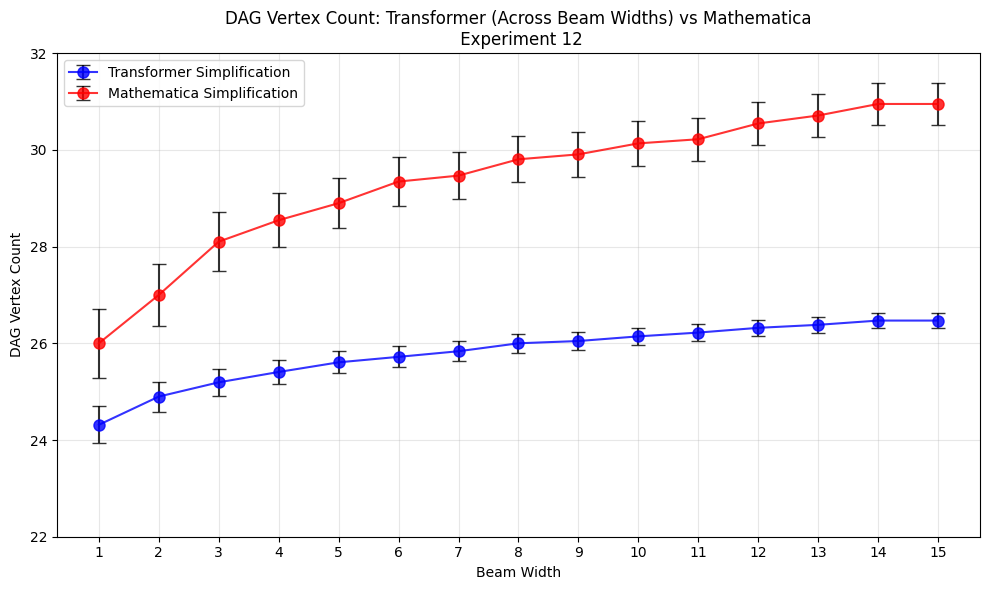

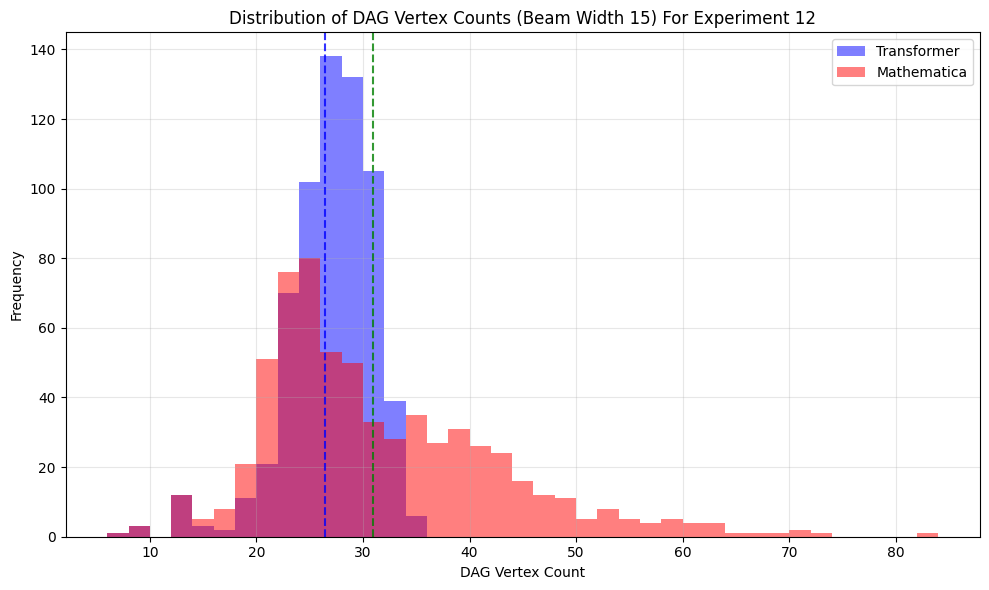

In [44]:
exp_num = 12
# NOTE : Change for each experiment
file_path = "data/data4_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp12_beam_width_results = {
1 : [3, 5, 10, 14, 25, 39, 43, 50, 68, 69, 74, 75, 79, 84, 86, 90, 102, 103, 112, 119, 122, 124, 130, 131, 142, 150, 152, 158, 171, 174, 182, 193, 206, 207, 221, 236, 240, 245, 249, 262, 270, 281, 283, 287, 289, 293, 298, 305, 314, 316, 321, 328, 341, 351, 370, 381, 384, 395, 397, 432, 438, 445, 450, 452, 462, 468, 469, 491, 502, 503, 506, 511, 515, 516, 518, 525, 540, 564, 578, 609, 610, 611, 615, 619, 632, 647, 657, 674, 693, 715, 731, 733, 748, 749, 771, 773, 781, 785, 794, 800, 802, 811, 813, 825, 826, 836, 847, 849, 858, 861, 865, 866, 868, 869, 886, 887, 898, 914, 919, 921, 926, 929, 930, 931, 942, 948, 951, 954, 956, 958, 969, 971, 981, 985, 988, 990, 1002, 1007, 1009, 1021, 1025, 1030, 1044, 1050, 1053, 1063, 1079, 1098, 1102, 1104, 1121, 1124, 1159, 1161, 1166, 1174, 1178, 1188, 1189],
2 : [3, 5, 10, 14, 25, 30, 33, 39, 43, 50, 53, 62, 68, 69, 74, 75, 79, 84, 86, 88, 90, 102, 103, 104, 112, 119, 122, 124, 130, 131, 142, 150, 152, 158, 171, 174, 177, 182, 190, 193, 200, 206, 207, 221, 236, 240, 245, 249, 252, 258, 262, 270, 276, 277, 281, 283, 287, 289, 290, 293, 294, 298, 305, 314, 316, 321, 326, 328, 341, 351, 370, 381, 384, 395, 397, 428, 432, 438, 440, 445, 450, 452, 462, 466, 468, 469, 491, 502, 503, 506, 511, 515, 516, 518, 525, 535, 537, 538, 540, 545, 560, 564, 574, 578, 580, 609, 610, 611, 615, 619, 632, 645, 647, 657, 674, 680, 693, 701, 709, 715, 731, 733, 741, 743, 744, 748, 749, 750, 771, 772, 773, 781, 785, 790, 794, 800, 802, 803, 811, 813, 814, 823, 825, 826, 836, 847, 849, 856, 858, 859, 861, 865, 866, 868, 869, 879, 886, 887, 891, 898, 914, 919, 921, 926, 929, 930, 931, 942, 948, 949, 951, 954, 956, 958, 963, 969, 971, 972, 981, 985, 988, 990, 992, 997, 1002, 1006, 1007, 1009, 1016, 1021, 1025, 1030, 1044, 1045, 1050, 1053, 1063, 1079, 1080, 1096, 1097, 1098, 1102, 1104, 1121, 1124, 1125, 1127, 1159, 1161, 1166, 1174, 1178, 1188, 1189, 1194],
3 : [3, 5, 10, 14, 25, 30, 33, 39, 42, 43, 44, 50, 53, 58, 62, 68, 69, 71, 74, 75, 79, 84, 86, 88, 90, 102, 103, 104, 112, 119, 122, 124, 128, 130, 131, 132, 142, 150, 152, 158, 159, 171, 172, 174, 177, 182, 190, 193, 200, 206, 207, 220, 221, 236, 240, 243, 245, 249, 252, 258, 262, 270, 273, 276, 277, 281, 283, 287, 289, 290, 293, 294, 298, 299, 305, 309, 310, 314, 316, 321, 325, 326, 328, 330, 341, 351, 370, 381, 384, 395, 397, 406, 428, 432, 438, 440, 445, 450, 451, 452, 462, 464, 466, 468, 469, 475, 491, 502, 503, 506, 511, 515, 516, 518, 519, 522, 525, 535, 537, 538, 540, 545, 560, 564, 574, 578, 580, 586, 608, 609, 610, 611, 615, 619, 630, 632, 645, 647, 657, 674, 680, 687, 693, 698, 701, 709, 711, 715, 731, 733, 736, 741, 743, 744, 748, 749, 750, 753, 754, 758, 771, 772, 773, 775, 781, 784, 785, 790, 794, 800, 802, 803, 808, 811, 813, 814, 819, 823, 825, 826, 831, 836, 847, 849, 856, 858, 859, 861, 865, 866, 868, 869, 879, 883, 886, 887, 891, 898, 899, 905, 914, 919, 921, 926, 929, 930, 931, 934, 937, 942, 946, 948, 949, 951, 954, 956, 958, 963, 969, 971, 972, 975, 981, 985, 988, 990, 992, 997, 1000, 1002, 1006, 1007, 1009, 1016, 1019, 1021, 1025, 1030, 1044, 1045, 1048, 1050, 1052, 1053, 1063, 1064, 1067, 1071, 1075, 1079, 1080, 1096, 1097, 1098, 1102, 1103, 1104, 1108, 1109, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1143, 1159, 1161, 1166, 1174, 1178, 1188, 1189, 1194],
4 : [1, 3, 5, 6, 10, 13, 14, 25, 30, 33, 39, 42, 43, 44, 50, 53, 58, 59, 62, 68, 69, 71, 74, 75, 79, 80, 84, 86, 88, 90, 100, 102, 103, 104, 112, 117, 119, 122, 124, 128, 130, 131, 132, 142, 150, 152, 158, 159, 166, 171, 172, 174, 177, 181, 182, 190, 193, 200, 203, 206, 207, 220, 221, 236, 238, 240, 243, 245, 248, 249, 252, 257, 258, 262, 270, 273, 276, 277, 281, 283, 287, 289, 290, 293, 294, 298, 299, 305, 309, 310, 314, 316, 321, 325, 326, 327, 328, 330, 341, 346, 347, 351, 354, 364, 370, 381, 382, 384, 393, 395, 397, 406, 407, 420, 422, 428, 432, 438, 440, 445, 450, 451, 452, 462, 464, 466, 468, 469, 473, 475, 477, 491, 501, 502, 503, 506, 511, 515, 516, 518, 519, 522, 525, 533, 535, 537, 538, 540, 545, 560, 564, 567, 568, 572, 574, 578, 580, 586, 608, 609, 610, 611, 615, 619, 626, 630, 632, 637, 641, 645, 647, 657, 666, 674, 680, 687, 691, 693, 698, 701, 709, 711, 715, 723, 731, 733, 734, 736, 741, 743, 744, 748, 749, 750, 753, 754, 758, 771, 772, 773, 775, 776, 781, 784, 785, 790, 794, 799, 800, 802, 803, 808, 811, 813, 814, 819, 823, 825, 826, 831, 836, 842, 847, 849, 856, 858, 859, 861, 865, 866, 868, 869, 879, 883, 886, 887, 889, 891, 898, 899, 904, 905, 914, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 937, 942, 946, 948, 949, 951, 954, 956, 958, 963, 966, 969, 971, 972, 975, 981, 985, 988, 990, 992, 997, 998, 1000, 1001, 1002, 1006, 1007, 1009, 1015, 1016, 1019, 1021, 1025, 1030, 1040, 1044, 1045, 1048, 1050, 1052, 1053, 1063, 1064, 1067, 1071, 1073, 1075, 1079, 1080, 1092, 1096, 1097, 1098, 1102, 1103, 1104, 1108, 1109, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1143, 1149, 1153, 1156, 1159, 1160, 1161, 1166, 1174, 1178, 1185, 1188, 1189, 1194],
5 : [1, 3, 5, 6, 10, 13, 14, 25, 30, 33, 39, 42, 43, 44, 49, 50, 53, 58, 59, 62, 63, 67, 68, 69, 71, 73, 74, 75, 79, 80, 84, 86, 88, 90, 100, 102, 103, 104, 109, 112, 117, 119, 122, 124, 128, 130, 131, 132, 142, 144, 146, 150, 152, 158, 159, 161, 166, 170, 171, 172, 174, 176, 177, 181, 182, 185, 190, 193, 195, 200, 203, 206, 207, 213, 218, 220, 221, 226, 236, 238, 240, 242, 243, 245, 248, 249, 252, 257, 258, 262, 270, 273, 274, 276, 277, 278, 281, 283, 287, 289, 290, 291, 293, 294, 298, 299, 305, 309, 310, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 341, 346, 347, 351, 354, 364, 370, 381, 382, 384, 386, 393, 395, 397, 406, 407, 420, 421, 422, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 455, 462, 464, 466, 468, 469, 473, 475, 477, 491, 501, 502, 503, 506, 508, 511, 515, 516, 518, 519, 522, 523, 525, 533, 535, 537, 538, 540, 545, 554, 560, 564, 567, 568, 572, 574, 578, 580, 586, 608, 609, 610, 611, 615, 617, 619, 625, 626, 630, 632, 637, 641, 645, 647, 648, 657, 666, 671, 674, 680, 687, 691, 693, 698, 701, 709, 711, 715, 723, 731, 733, 734, 736, 741, 743, 744, 748, 749, 750, 753, 754, 758, 771, 772, 773, 775, 776, 781, 784, 785, 790, 794, 799, 800, 802, 803, 808, 811, 813, 814, 818, 819, 823, 825, 826, 831, 836, 841, 842, 847, 849, 856, 858, 859, 861, 865, 866, 868, 869, 879, 880, 883, 886, 887, 889, 891, 894, 898, 899, 903, 904, 905, 907, 914, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 937, 942, 946, 948, 949, 951, 954, 956, 958, 962, 963, 966, 969, 971, 972, 975, 979, 980, 981, 985, 988, 990, 992, 997, 998, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1013, 1015, 1016, 1019, 1021, 1025, 1030, 1040, 1044, 1045, 1048, 1050, 1052, 1053, 1063, 1064, 1067, 1071, 1073, 1075, 1079, 1080, 1092, 1096, 1097, 1098, 1102, 1103, 1104, 1106, 1107, 1108, 1109, 1115, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1143, 1149, 1150, 1153, 1156, 1159, 1160, 1161, 1164, 1166, 1174, 1178, 1185, 1188, 1189, 1194],
6 : [1, 3, 5, 6, 10, 11, 13, 14, 23, 25, 30, 33, 39, 42, 43, 44, 49, 50, 53, 58, 59, 62, 63, 67, 68, 69, 71, 73, 74, 75, 79, 80, 84, 86, 88, 90, 100, 102, 103, 104, 109, 112, 117, 119, 122, 124, 128, 130, 131, 132, 142, 144, 146, 148, 150, 152, 157, 158, 159, 161, 166, 170, 171, 172, 174, 176, 177, 178, 181, 182, 185, 190, 193, 195, 200, 203, 206, 207, 213, 218, 220, 221, 226, 236, 237, 238, 240, 242, 243, 245, 248, 249, 252, 257, 258, 262, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 289, 290, 291, 292, 293, 294, 298, 299, 305, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 341, 346, 347, 348, 351, 354, 364, 365, 370, 379, 381, 382, 384, 386, 393, 395, 397, 402, 406, 407, 410, 420, 421, 422, 424, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 455, 462, 464, 466, 468, 469, 471, 473, 474, 475, 477, 486, 491, 500, 501, 502, 503, 506, 508, 511, 515, 516, 518, 519, 522, 523, 525, 530, 533, 535, 537, 538, 540, 544, 545, 547, 554, 560, 564, 567, 568, 572, 574, 575, 578, 580, 586, 603, 608, 609, 610, 611, 615, 617, 618, 619, 625, 626, 630, 632, 637, 641, 645, 647, 648, 657, 666, 671, 674, 680, 687, 691, 693, 698, 701, 709, 711, 715, 723, 729, 731, 733, 734, 736, 741, 743, 744, 748, 749, 750, 753, 754, 755, 758, 771, 772, 773, 775, 776, 778, 781, 784, 785, 790, 794, 799, 800, 802, 803, 806, 808, 811, 813, 814, 818, 819, 823, 825, 826, 831, 836, 841, 842, 847, 849, 856, 858, 859, 861, 865, 866, 868, 869, 879, 880, 883, 886, 887, 889, 891, 894, 898, 899, 903, 904, 905, 907, 914, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 937, 942, 946, 948, 949, 951, 952, 954, 956, 958, 962, 963, 966, 969, 971, 972, 975, 979, 980, 981, 985, 988, 990, 992, 997, 998, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1025, 1026, 1030, 1034, 1040, 1044, 1045, 1046, 1048, 1050, 1051, 1052, 1053, 1056, 1063, 1064, 1067, 1071, 1073, 1075, 1079, 1080, 1092, 1096, 1097, 1098, 1102, 1103, 1104, 1106, 1107, 1108, 1109, 1115, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1143, 1149, 1150, 1153, 1156, 1159, 1160, 1161, 1164, 1166, 1174, 1175, 1178, 1185, 1188, 1189, 1194],
7 : [1, 3, 5, 6, 7, 10, 11, 13, 14, 23, 25, 30, 33, 36, 39, 42, 43, 44, 49, 50, 53, 54, 58, 59, 62, 63, 64, 67, 68, 69, 71, 73, 74, 75, 79, 80, 84, 86, 88, 90, 100, 102, 103, 104, 109, 112, 117, 119, 122, 124, 128, 130, 131, 132, 142, 144, 146, 148, 150, 152, 157, 158, 159, 161, 165, 166, 170, 171, 172, 174, 176, 177, 178, 181, 182, 185, 190, 193, 195, 200, 203, 206, 207, 213, 217, 218, 220, 221, 226, 236, 237, 238, 240, 242, 243, 245, 248, 249, 252, 254, 257, 258, 262, 264, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 289, 290, 291, 292, 293, 294, 298, 299, 305, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 351, 354, 364, 365, 370, 373, 379, 381, 382, 384, 386, 393, 395, 397, 402, 406, 407, 410, 416, 419, 420, 421, 422, 424, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 455, 462, 464, 466, 468, 469, 470, 471, 473, 474, 475, 477, 486, 491, 500, 501, 502, 503, 506, 508, 511, 515, 516, 518, 519, 522, 523, 525, 529, 530, 533, 535, 536, 537, 538, 540, 544, 545, 547, 554, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 586, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 630, 632, 637, 641, 645, 647, 648, 657, 666, 671, 674, 679, 680, 684, 687, 691, 693, 698, 700, 701, 705, 709, 711, 715, 723, 729, 731, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 760, 771, 772, 773, 775, 776, 778, 781, 784, 785, 787, 790, 794, 799, 800, 802, 803, 806, 808, 811, 813, 814, 818, 819, 823, 825, 826, 831, 836, 841, 842, 847, 849, 856, 858, 859, 861, 865, 866, 868, 869, 879, 880, 883, 886, 887, 889, 891, 894, 897, 898, 899, 903, 904, 905, 907, 910, 914, 917, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 937, 942, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 979, 980, 981, 985, 988, 990, 992, 997, 998, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1025, 1026, 1030, 1034, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1050, 1051, 1052, 1053, 1055, 1056, 1063, 1064, 1067, 1071, 1073, 1075, 1079, 1080, 1092, 1096, 1097, 1098, 1102, 1103, 1104, 1106, 1107, 1108, 1109, 1115, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1143, 1149, 1150, 1153, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1174, 1175, 1178, 1185, 1188, 1189, 1194, 1199],
8 : [1, 3, 5, 6, 7, 10, 11, 13, 14, 23, 25, 30, 33, 36, 39, 42, 43, 44, 49, 50, 53, 54, 58, 59, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 82, 84, 86, 88, 90, 100, 102, 103, 104, 109, 112, 117, 119, 122, 124, 128, 130, 131, 132, 140, 142, 144, 146, 148, 150, 152, 157, 158, 159, 161, 162, 163, 165, 166, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 190, 193, 195, 196, 199, 200, 203, 206, 207, 208, 209, 213, 217, 218, 220, 221, 226, 236, 237, 238, 240, 242, 243, 245, 248, 249, 252, 254, 257, 258, 262, 264, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 289, 290, 291, 292, 293, 294, 298, 299, 302, 305, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 351, 353, 354, 364, 365, 370, 373, 379, 381, 382, 384, 386, 393, 394, 395, 397, 402, 404, 406, 407, 410, 416, 419, 420, 421, 422, 424, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 455, 462, 464, 466, 468, 469, 470, 471, 473, 474, 475, 477, 480, 486, 491, 499, 500, 501, 502, 503, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 547, 554, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 586, 591, 595, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 630, 632, 637, 641, 645, 647, 648, 653, 657, 666, 671, 674, 679, 680, 684, 687, 691, 693, 698, 700, 701, 705, 709, 711, 715, 723, 729, 731, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 760, 771, 772, 773, 775, 776, 778, 781, 784, 785, 787, 790, 794, 799, 800, 801, 802, 803, 806, 808, 811, 813, 814, 818, 819, 823, 824, 825, 826, 831, 836, 841, 842, 847, 849, 855, 856, 858, 859, 861, 865, 866, 868, 869, 879, 880, 882, 883, 886, 887, 889, 891, 894, 897, 898, 899, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 935, 937, 942, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 979, 980, 981, 985, 988, 990, 992, 996, 997, 998, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1025, 1026, 1030, 1034, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1050, 1051, 1052, 1053, 1055, 1056, 1063, 1064, 1067, 1071, 1073, 1075, 1079, 1080, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1106, 1107, 1108, 1109, 1115, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1143, 1149, 1150, 1153, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1174, 1175, 1178, 1185, 1188, 1189, 1194, 1199],
9 : [1, 3, 5, 6, 7, 10, 11, 13, 14, 23, 25, 30, 33, 36, 39, 42, 43, 44, 49, 50, 53, 54, 58, 59, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 82, 84, 86, 88, 90, 94, 100, 102, 103, 104, 109, 112, 116, 117, 119, 120, 122, 124, 128, 130, 131, 132, 136, 140, 142, 144, 146, 148, 150, 152, 157, 158, 159, 161, 162, 163, 165, 166, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 188, 190, 193, 195, 196, 199, 200, 203, 206, 207, 208, 209, 213, 216, 217, 218, 220, 221, 226, 236, 237, 238, 240, 242, 243, 245, 246, 248, 249, 252, 254, 257, 258, 262, 264, 265, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 289, 290, 291, 292, 293, 294, 298, 299, 302, 305, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 351, 353, 354, 364, 365, 370, 373, 379, 381, 382, 384, 386, 393, 394, 395, 397, 402, 404, 406, 407, 410, 411, 416, 419, 420, 421, 422, 424, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 454, 455, 462, 464, 466, 468, 469, 470, 471, 473, 474, 475, 477, 480, 486, 491, 499, 500, 501, 502, 503, 504, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 547, 550, 554, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 586, 591, 595, 602, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 630, 632, 633, 637, 641, 645, 647, 648, 653, 657, 666, 670, 671, 674, 679, 680, 684, 687, 691, 692, 693, 698, 700, 701, 705, 709, 711, 715, 723, 727, 729, 730, 731, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 760, 771, 772, 773, 775, 776, 778, 781, 784, 785, 787, 790, 792, 794, 799, 800, 801, 802, 803, 806, 808, 811, 813, 814, 818, 819, 823, 824, 825, 826, 831, 836, 841, 842, 847, 849, 850, 855, 856, 858, 859, 861, 865, 866, 868, 869, 879, 880, 882, 883, 886, 887, 889, 891, 894, 897, 898, 899, 901, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 935, 937, 941, 942, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 979, 980, 981, 985, 988, 990, 992, 996, 997, 998, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1025, 1026, 1030, 1034, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1063, 1064, 1067, 1071, 1073, 1075, 1076, 1079, 1080, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1115, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1142, 1143, 1149, 1150, 1153, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1170, 1174, 1175, 1178, 1185, 1188, 1189, 1194, 1199],
10 : [1, 3, 5, 6, 7, 10, 11, 13, 14, 23, 25, 30, 33, 36, 39, 42, 43, 44, 45, 49, 50, 53, 54, 58, 59, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 82, 84, 85, 86, 88, 90, 94, 100, 102, 103, 104, 109, 112, 116, 117, 119, 120, 122, 124, 128, 130, 131, 132, 133, 136, 140, 142, 144, 145, 146, 148, 150, 152, 157, 158, 159, 161, 162, 163, 165, 166, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 188, 190, 193, 195, 196, 199, 200, 203, 206, 207, 208, 209, 211, 213, 216, 217, 218, 220, 221, 224, 226, 236, 237, 238, 240, 242, 243, 245, 246, 248, 249, 252, 254, 257, 258, 262, 264, 265, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 288, 289, 290, 291, 292, 293, 294, 295, 298, 299, 302, 305, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 349, 351, 353, 354, 364, 365, 370, 373, 379, 381, 382, 384, 386, 387, 388, 393, 394, 395, 397, 402, 404, 406, 407, 408, 410, 411, 416, 419, 420, 421, 422, 424, 427, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 454, 455, 459, 462, 463, 464, 466, 468, 469, 470, 471, 473, 474, 475, 477, 478, 480, 486, 491, 499, 500, 501, 502, 503, 504, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 547, 550, 551, 553, 554, 556, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 586, 591, 595, 602, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 630, 632, 633, 637, 641, 645, 647, 648, 653, 657, 666, 670, 671, 674, 678, 679, 680, 681, 684, 687, 691, 692, 693, 698, 700, 701, 705, 709, 711, 715, 723, 727, 729, 730, 731, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 760, 771, 772, 773, 775, 776, 778, 781, 784, 785, 787, 790, 792, 794, 799, 800, 801, 802, 803, 806, 808, 809, 811, 812, 813, 814, 818, 819, 823, 824, 825, 826, 831, 836, 839, 841, 842, 847, 849, 850, 855, 856, 858, 859, 861, 865, 866, 868, 869, 879, 880, 882, 883, 886, 887, 889, 891, 894, 897, 898, 899, 901, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 935, 937, 940, 941, 942, 943, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 979, 980, 981, 985, 988, 990, 991, 992, 996, 997, 998, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1025, 1026, 1030, 1034, 1036, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1063, 1064, 1067, 1071, 1073, 1075, 1076, 1078, 1079, 1080, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1115, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1142, 1143, 1149, 1150, 1153, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1170, 1174, 1175, 1178, 1179, 1185, 1188, 1189, 1194, 1195, 1199],
11 : [1, 3, 5, 6, 7, 10, 11, 13, 14, 23, 25, 30, 33, 36, 39, 42, 43, 44, 45, 47, 49, 50, 53, 54, 58, 59, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 94, 100, 102, 103, 104, 106, 109, 112, 116, 117, 119, 120, 122, 124, 128, 130, 131, 132, 133, 135, 136, 140, 142, 143, 144, 145, 146, 148, 150, 152, 153, 157, 158, 159, 161, 162, 163, 165, 166, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 188, 190, 193, 195, 196, 199, 200, 203, 204, 206, 207, 208, 209, 211, 213, 216, 217, 218, 220, 221, 224, 226, 231, 236, 237, 238, 240, 242, 243, 245, 246, 248, 249, 252, 254, 257, 258, 262, 264, 265, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 288, 289, 290, 291, 292, 293, 294, 295, 298, 299, 302, 304, 305, 306, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 349, 351, 353, 354, 364, 365, 370, 373, 379, 381, 382, 384, 385, 386, 387, 388, 393, 394, 395, 397, 401, 402, 404, 406, 407, 408, 410, 411, 416, 419, 420, 421, 422, 424, 427, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 454, 455, 459, 462, 463, 464, 466, 467, 468, 469, 470, 471, 473, 474, 475, 477, 478, 480, 486, 491, 499, 500, 501, 502, 503, 504, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 546, 547, 550, 551, 553, 554, 556, 558, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 586, 591, 595, 602, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 628, 630, 632, 633, 637, 641, 645, 647, 648, 653, 657, 666, 670, 671, 674, 678, 679, 680, 681, 684, 687, 691, 692, 693, 698, 700, 701, 705, 709, 711, 715, 723, 727, 729, 730, 731, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 760, 771, 772, 773, 775, 776, 778, 781, 783, 784, 785, 787, 790, 792, 794, 799, 800, 801, 802, 803, 806, 807, 808, 809, 811, 812, 813, 814, 818, 819, 823, 824, 825, 826, 829, 831, 836, 839, 841, 842, 847, 849, 850, 855, 856, 858, 859, 861, 865, 866, 867, 868, 869, 879, 880, 882, 883, 886, 887, 889, 891, 894, 897, 898, 899, 901, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 935, 937, 938, 940, 941, 942, 943, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 979, 980, 981, 985, 988, 990, 991, 992, 996, 997, 998, 999, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1023, 1024, 1025, 1026, 1027, 1029, 1030, 1034, 1036, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1063, 1064, 1067, 1071, 1073, 1075, 1076, 1078, 1079, 1080, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1113, 1115, 1116, 1121, 1124, 1125, 1127, 1139, 1140, 1142, 1143, 1145, 1149, 1150, 1153, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1170, 1174, 1175, 1178, 1179, 1185, 1188, 1189, 1194, 1195, 1199],
12 : [1, 3, 5, 6, 7, 10, 11, 13, 14, 23, 25, 28, 30, 33, 36, 39, 42, 43, 44, 45, 47, 48, 49, 50, 53, 54, 58, 59, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 94, 100, 102, 103, 104, 106, 109, 112, 113, 114, 116, 117, 119, 120, 122, 123, 124, 128, 130, 131, 132, 133, 135, 136, 140, 141, 142, 143, 144, 145, 146, 148, 150, 152, 153, 157, 158, 159, 161, 162, 163, 165, 166, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 188, 190, 193, 195, 196, 197, 199, 200, 203, 204, 206, 207, 208, 209, 211, 213, 216, 217, 218, 220, 221, 224, 226, 231, 236, 237, 238, 240, 242, 243, 244, 245, 246, 248, 249, 252, 254, 257, 258, 262, 264, 265, 266, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 288, 289, 290, 291, 292, 293, 294, 295, 298, 299, 302, 304, 305, 306, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 349, 351, 353, 354, 364, 365, 370, 373, 379, 381, 382, 384, 385, 386, 387, 388, 393, 394, 395, 397, 401, 402, 404, 406, 407, 408, 410, 411, 416, 419, 420, 421, 422, 424, 427, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 454, 455, 459, 462, 463, 464, 466, 467, 468, 469, 470, 471, 473, 474, 475, 477, 478, 480, 486, 491, 499, 500, 501, 502, 503, 504, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 546, 547, 550, 551, 553, 554, 556, 558, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 584, 586, 589, 591, 594, 595, 602, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 628, 630, 632, 633, 637, 641, 645, 647, 648, 653, 657, 666, 667, 670, 671, 674, 678, 679, 680, 681, 682, 684, 687, 691, 692, 693, 698, 700, 701, 705, 709, 711, 715, 721, 723, 727, 729, 730, 731, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 760, 771, 772, 773, 775, 776, 778, 779, 781, 783, 784, 785, 787, 788, 790, 792, 794, 798, 799, 800, 801, 802, 803, 806, 807, 808, 809, 811, 812, 813, 814, 818, 819, 823, 824, 825, 826, 829, 831, 836, 839, 841, 842, 847, 849, 850, 855, 856, 858, 859, 861, 865, 866, 867, 868, 869, 876, 879, 880, 882, 883, 886, 887, 889, 891, 894, 897, 898, 899, 901, 902, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 935, 937, 938, 940, 941, 942, 943, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 977, 979, 980, 981, 985, 988, 990, 991, 992, 996, 997, 998, 999, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1023, 1024, 1025, 1026, 1027, 1029, 1030, 1034, 1036, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1063, 1064, 1067, 1069, 1071, 1073, 1075, 1076, 1078, 1079, 1080, 1088, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1113, 1115, 1116, 1121, 1124, 1125, 1127, 1138, 1139, 1140, 1142, 1143, 1145, 1149, 1150, 1153, 1154, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1170, 1171, 1174, 1175, 1177, 1178, 1179, 1185, 1188, 1189, 1194, 1195, 1199],
13 : [1, 3, 5, 6, 7, 8, 10, 11, 13, 14, 23, 25, 28, 30, 33, 36, 39, 42, 43, 44, 45, 47, 48, 49, 50, 53, 54, 58, 59, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 94, 100, 102, 103, 104, 106, 109, 112, 113, 114, 115, 116, 117, 119, 120, 122, 123, 124, 127, 128, 130, 131, 132, 133, 135, 136, 140, 141, 142, 143, 144, 145, 146, 148, 150, 152, 153, 157, 158, 159, 161, 162, 163, 165, 166, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 188, 190, 193, 195, 196, 197, 199, 200, 203, 204, 206, 207, 208, 209, 211, 213, 216, 217, 218, 220, 221, 224, 226, 231, 236, 237, 238, 240, 242, 243, 244, 245, 246, 248, 249, 252, 254, 257, 258, 262, 264, 265, 266, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 288, 289, 290, 291, 292, 293, 294, 295, 298, 299, 302, 304, 305, 306, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 349, 351, 353, 354, 356, 364, 365, 370, 373, 379, 381, 382, 383, 384, 385, 386, 387, 388, 391, 393, 394, 395, 397, 401, 402, 404, 406, 407, 408, 410, 411, 415, 416, 419, 420, 421, 422, 424, 427, 428, 429, 432, 438, 440, 445, 446, 450, 451, 452, 453, 454, 455, 459, 461, 462, 463, 464, 466, 467, 468, 469, 470, 471, 473, 474, 475, 477, 478, 480, 486, 491, 499, 500, 501, 502, 503, 504, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 546, 547, 550, 551, 553, 554, 556, 557, 558, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 584, 586, 589, 591, 594, 595, 602, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 628, 630, 632, 633, 637, 641, 645, 647, 648, 653, 657, 666, 667, 670, 671, 674, 678, 679, 680, 681, 682, 684, 687, 691, 692, 693, 698, 700, 701, 705, 709, 711, 715, 716, 717, 718, 721, 723, 727, 729, 730, 731, 732, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 759, 760, 771, 772, 773, 775, 776, 778, 779, 781, 783, 784, 785, 787, 788, 790, 792, 794, 796, 798, 799, 800, 801, 802, 803, 806, 807, 808, 809, 811, 812, 813, 814, 815, 818, 819, 823, 824, 825, 826, 829, 831, 836, 839, 841, 842, 846, 847, 849, 850, 855, 856, 857, 858, 859, 860, 861, 865, 866, 867, 868, 869, 876, 879, 880, 882, 883, 886, 887, 889, 891, 894, 897, 898, 899, 901, 902, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 929, 930, 931, 934, 935, 937, 938, 940, 941, 942, 943, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 977, 979, 980, 981, 985, 988, 990, 991, 992, 996, 997, 998, 999, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1013, 1015, 1016, 1019, 1021, 1023, 1024, 1025, 1026, 1027, 1029, 1030, 1034, 1036, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1061, 1063, 1064, 1067, 1069, 1071, 1073, 1075, 1076, 1078, 1079, 1080, 1088, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1113, 1115, 1116, 1121, 1124, 1125, 1127, 1138, 1139, 1140, 1142, 1143, 1145, 1149, 1150, 1153, 1154, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1170, 1171, 1174, 1175, 1177, 1178, 1179, 1185, 1188, 1189, 1194, 1195, 1199],
14 : [1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 23, 25, 28, 30, 33, 36, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 58, 59, 60, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 94, 100, 102, 103, 104, 106, 109, 112, 113, 114, 115, 116, 117, 119, 120, 122, 123, 124, 127, 128, 130, 131, 132, 133, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 148, 150, 151, 152, 153, 157, 158, 159, 161, 162, 163, 165, 166, 167, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 188, 190, 193, 195, 196, 197, 199, 200, 203, 204, 206, 207, 208, 209, 211, 213, 216, 217, 218, 220, 221, 224, 226, 231, 236, 237, 238, 240, 242, 243, 244, 245, 246, 248, 249, 251, 252, 254, 257, 258, 262, 264, 265, 266, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 288, 289, 290, 291, 292, 293, 294, 295, 298, 299, 302, 304, 305, 306, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 349, 351, 353, 354, 356, 362, 364, 365, 370, 373, 377, 379, 381, 382, 383, 384, 385, 386, 387, 388, 390, 391, 393, 394, 395, 397, 401, 402, 404, 406, 407, 408, 410, 411, 412, 415, 416, 419, 420, 421, 422, 424, 427, 428, 429, 432, 438, 440, 442, 445, 446, 450, 451, 452, 453, 454, 455, 459, 461, 462, 463, 464, 466, 467, 468, 469, 470, 471, 473, 474, 475, 477, 478, 480, 486, 491, 499, 500, 501, 502, 503, 504, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 528, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 546, 547, 550, 551, 553, 554, 556, 557, 558, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 584, 586, 588, 589, 591, 594, 595, 599, 602, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 628, 630, 632, 633, 637, 641, 645, 646, 647, 648, 653, 657, 666, 667, 670, 671, 674, 678, 679, 680, 681, 682, 684, 687, 691, 692, 693, 698, 700, 701, 705, 709, 711, 715, 716, 717, 718, 721, 723, 724, 727, 728, 729, 730, 731, 732, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 759, 760, 769, 771, 772, 773, 775, 776, 778, 779, 781, 783, 784, 785, 787, 788, 790, 792, 794, 796, 798, 799, 800, 801, 802, 803, 806, 807, 808, 809, 811, 812, 813, 814, 815, 818, 819, 823, 824, 825, 826, 829, 831, 836, 839, 841, 842, 846, 847, 849, 850, 852, 855, 856, 857, 858, 859, 860, 861, 865, 866, 867, 868, 869, 876, 879, 880, 882, 883, 884, 886, 887, 889, 891, 894, 897, 898, 899, 901, 902, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 927, 929, 930, 931, 934, 935, 937, 938, 940, 941, 942, 943, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 977, 979, 980, 981, 985, 988, 990, 991, 992, 996, 997, 998, 999, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1011, 1013, 1015, 1016, 1019, 1021, 1023, 1024, 1025, 1026, 1027, 1029, 1030, 1034, 1036, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1061, 1063, 1064, 1067, 1069, 1071, 1073, 1075, 1076, 1078, 1079, 1080, 1088, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1113, 1115, 1116, 1121, 1124, 1125, 1127, 1138, 1139, 1140, 1142, 1143, 1145, 1149, 1150, 1153, 1154, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1170, 1171, 1174, 1175, 1177, 1178, 1179, 1181, 1185, 1188, 1189, 1194, 1195, 1199],
15 : [1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 23, 25, 28, 30, 33, 36, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 58, 59, 60, 62, 63, 64, 67, 68, 69, 70, 71, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 94, 100, 102, 103, 104, 106, 109, 112, 113, 114, 115, 116, 117, 119, 120, 122, 123, 124, 127, 128, 130, 131, 132, 133, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 148, 150, 151, 152, 153, 157, 158, 159, 161, 162, 163, 165, 166, 167, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 185, 188, 190, 193, 195, 196, 197, 199, 200, 203, 204, 206, 207, 208, 209, 211, 213, 216, 217, 218, 220, 221, 224, 226, 231, 236, 237, 238, 240, 242, 243, 244, 245, 246, 248, 249, 251, 252, 254, 257, 258, 262, 264, 265, 266, 269, 270, 271, 272, 273, 274, 276, 277, 278, 281, 283, 287, 288, 289, 290, 291, 292, 293, 294, 295, 298, 299, 302, 304, 305, 306, 309, 310, 313, 314, 315, 316, 321, 323, 325, 326, 327, 328, 330, 334, 339, 341, 346, 347, 348, 349, 351, 353, 354, 356, 362, 364, 365, 370, 373, 377, 379, 381, 382, 383, 384, 385, 386, 387, 388, 390, 391, 393, 394, 395, 397, 401, 402, 404, 406, 407, 408, 410, 411, 412, 415, 416, 419, 420, 421, 422, 424, 427, 428, 429, 432, 438, 440, 442, 445, 446, 450, 451, 452, 453, 454, 455, 459, 461, 462, 463, 464, 466, 467, 468, 469, 470, 471, 473, 474, 475, 477, 478, 480, 486, 491, 499, 500, 501, 502, 503, 504, 506, 508, 511, 515, 516, 518, 519, 522, 523, 524, 525, 528, 529, 530, 533, 534, 535, 536, 537, 538, 540, 544, 545, 546, 547, 550, 551, 553, 554, 556, 557, 558, 560, 564, 567, 568, 571, 572, 574, 575, 578, 580, 584, 586, 588, 589, 591, 594, 595, 599, 602, 603, 608, 609, 610, 611, 614, 615, 617, 618, 619, 625, 626, 628, 630, 632, 633, 637, 641, 645, 646, 647, 648, 653, 657, 666, 667, 670, 671, 674, 678, 679, 680, 681, 682, 684, 687, 691, 692, 693, 698, 700, 701, 705, 709, 711, 715, 716, 717, 718, 721, 723, 724, 727, 728, 729, 730, 731, 732, 733, 734, 736, 741, 743, 744, 747, 748, 749, 750, 753, 754, 755, 758, 759, 760, 769, 771, 772, 773, 775, 776, 778, 779, 781, 783, 784, 785, 787, 788, 790, 792, 794, 796, 798, 799, 800, 801, 802, 803, 806, 807, 808, 809, 811, 812, 813, 814, 815, 818, 819, 823, 824, 825, 826, 829, 831, 836, 839, 841, 842, 846, 847, 849, 850, 852, 855, 856, 857, 858, 859, 860, 861, 865, 866, 867, 868, 869, 876, 879, 880, 882, 883, 884, 886, 887, 889, 891, 894, 897, 898, 899, 901, 902, 903, 904, 905, 907, 910, 914, 916, 917, 919, 920, 921, 922, 923, 926, 927, 929, 930, 931, 934, 935, 937, 938, 940, 941, 942, 943, 946, 948, 949, 951, 952, 954, 956, 957, 958, 962, 963, 966, 969, 971, 972, 975, 977, 979, 980, 981, 985, 988, 990, 991, 992, 996, 997, 998, 999, 1000, 1001, 1002, 1006, 1007, 1008, 1009, 1010, 1011, 1013, 1015, 1016, 1019, 1021, 1023, 1024, 1025, 1026, 1027, 1029, 1030, 1034, 1036, 1038, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1061, 1063, 1064, 1067, 1069, 1071, 1073, 1075, 1076, 1078, 1079, 1080, 1088, 1090, 1092, 1096, 1097, 1098, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1113, 1115, 1116, 1121, 1124, 1125, 1127, 1138, 1139, 1140, 1142, 1143, 1145, 1149, 1150, 1153, 1154, 1156, 1159, 1160, 1161, 1164, 1165, 1166, 1167, 1170, 1171, 1174, 1175, 1177, 1178, 1179, 1181, 1185, 1188, 1189, 1194, 1195, 1199]
}
beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp12_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    n_samples = len(transformer_leafcount)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'transformer_se': np.std(transformer_leafcount) / np.sqrt(n_samples),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'mma_se': np.std(mma_leafcount) / np.sqrt(n_samples),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
transformer_ses = [stats['transformer_se'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]
mma_ses = [stats['mma_se'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Define a smaller offset for dots
offset = 0.0  # reduced from bar_width/2 which was likely too large

# Create dot plots with lines and error bars
plt.errorbar(index - offset, transformer_means,
            yerr=transformer_ses,
            label='Transformer Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='blue',
            ecolor='black',
            alpha=0.8,
            markersize=8)

plt.errorbar(index + offset, mma_means,
            yerr=mma_ses,
            label='Mathematica Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='red',
            ecolor='black',
            alpha=0.8,
            markersize=8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('DAG Vertex Count')
plt.title(f'DAG Vertex Count: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.ylim((22, 32))
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
# for i, v in enumerate(transformer_means):
#     plt.text(i - bar_width/2, v + transformer_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')
# for i, v in enumerate(mma_means):
#     plt.text(i + bar_width/2, v + mma_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp12_beam_width_results[15])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 40)  # Create 40 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='blue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='red')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('DAG Vertex Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of DAG Vertex Counts (Beam Width 15) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer vertex count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica vertex count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in vertex count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


In [45]:
file_path = "data/data4_test_DAG_large.txt"
test_cases = read_test_cases(file_path)

file_path = "data/data4_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

for beam_width, correct_indices in exp12_beam_width_results.items():
    res = find_top_differences(test_cases_leafcount, correct_indices, test_cases)
    print("Exp 12")
    print(f"Beam Width : {beam_width}")
    print(f"1 (Difference : {res[0][1]}) : {res[0][2]}")
    print(f"2 (Difference : {res[1][1]}) : {res[1][2]}")
    print(f"3 (Difference : {res[2][1]}) : {res[2][2]}")

Exp 12
Beam Width : 1
1 (Difference : 25) : + * P 5 * ^ a0 P 3 ^ a1 P 6 + * P 7 5 * ^ a0 P 2 * ^ a1 P 6 a2 + * P 1 2 5 * ^ a0 P 5 * ^ a1 P 2 ^ a2 P 2 + * P 3 7 5 * a0 * ^ a1 P 6 ^ a2 P 2 + * N 5 0 0 * ^ a0 P 6 ^ a2 P 3 + * P 5 7 5 * ^ a0 P 4 * ^ a1 P 2 ^ a2 P 3 + * P 6 2 5 * ^ a1 P 6 ^ a2 P 3 + * P 3 0 0 * ^ a0 P 5 ^ a2 P 4 + * N 2 4 5 * ^ a0 P 3 * ^ a1 P 2 ^ a2 P 4 + * N 6 0 * ^ a0 P 4 ^ a2 P 5 + * P 2 5 * ^ a0 P 2 * ^ a1 P 2 ^ a2 P 5 * P 4 * ^ a0 P 3 ^ a2 P 6 ? + * N 5 ^ b0 P 3 + * N 5 * b0 ^ b1 P 2 * P 4 ^ b1 P 3 & + * N 1 * a0 ^ a1 P 2 * N 5 * ^ a1 P 2 a2 & + * N 5 * ^ a0 P 2 a2 * a0 ^ a2 P 2
2 (Difference : 23) : + * N 3 7 5 * ^ a0 P 6 ^ a1 P 3 + * N 2 5 0 * ^ a0 P 5 ^ a1 P 4 + * N 2 5 0 * ^ a0 P 3 ^ a1 P 6 + * P 2 0 0 * ^ a0 P 6 * ^ a1 P 2 a2 + * N 6 7 5 * ^ a0 P 5 * ^ a1 P 3 a2 + * P 3 0 0 * ^ a0 P 4 * ^ a1 P 4 a2 + * N 2 4 0 * ^ a0 P 5 * ^ a1 P 2 ^ a2 P 2 + * N 4 0 5 * ^ a0 P 4 * ^ a1 P 3 ^ a2 P 2 + * N 9 0 * ^ a0 P 3 * ^ a1 P 4 ^ a2 P 2 + * P 1 2 8 * ^ a0 P 6 ^ a2 P 3 + * P 7 

# Exp 13 Vertex Count (Transformer vs. MMA)

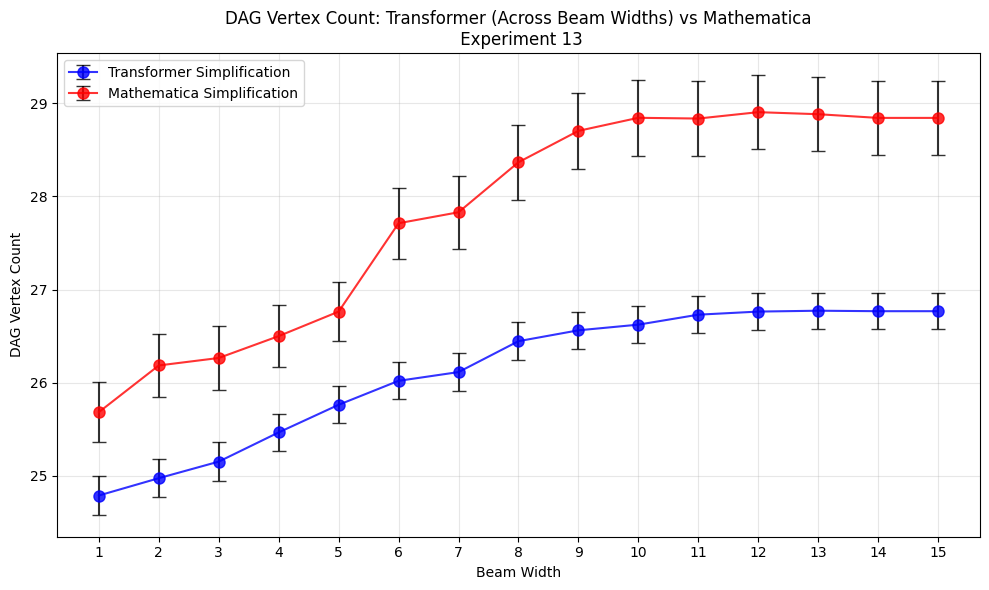

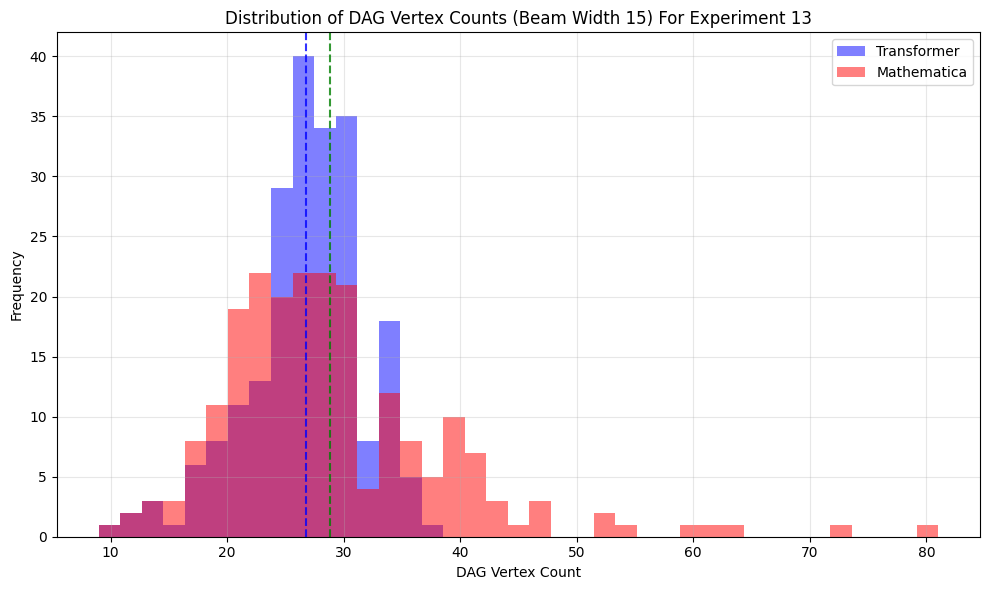

In [46]:
exp_num = 13
# NOTE : Change for each experiment
file_path = "data/data5_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp13_beam_width_results = {
1 : [17, 47, 48, 177, 183, 186, 197, 220, 231, 234, 250, 278, 312, 323, 328, 338, 353, 356, 369, 383, 404, 405, 413, 441, 445, 470, 477, 480, 517, 567, 607, 616, 648, 651, 675, 682, 757, 767, 783, 837, 869, 878, 880, 895, 956, 958, 979, 994, 1001, 1024, 1029, 1047, 1062, 1063, 1144, 1150, 1164],
2 : [17, 23, 47, 48, 55, 88, 165, 176, 177, 183, 186, 197, 220, 223, 224, 231, 234, 237, 250, 278, 291, 312, 323, 328, 338, 353, 356, 369, 382, 383, 404, 405, 413, 438, 441, 445, 461, 470, 477, 480, 517, 555, 567, 607, 616, 626, 648, 651, 675, 682, 757, 767, 783, 784, 826, 837, 869, 878, 880, 886, 891, 895, 914, 956, 958, 961, 979, 994, 1001, 1024, 1029, 1047, 1058, 1062, 1063, 1095, 1100, 1134, 1144, 1150, 1164],
3 : [17, 23, 36, 47, 48, 55, 88, 115, 141, 146, 154, 156, 165, 176, 177, 183, 186, 197, 217, 220, 223, 224, 231, 234, 237, 250, 278, 291, 312, 323, 328, 338, 353, 356, 369, 382, 383, 404, 405, 413, 416, 437, 438, 441, 445, 461, 470, 477, 480, 517, 555, 567, 570, 598, 607, 616, 626, 648, 651, 675, 682, 757, 767, 783, 784, 817, 826, 837, 869, 878, 879, 880, 886, 891, 895, 908, 914, 956, 958, 959, 961, 979, 994, 1001, 1024, 1029, 1047, 1058, 1062, 1063, 1095, 1100, 1109, 1129, 1134, 1144, 1150, 1164],
4 : [17, 23, 36, 47, 48, 55, 88, 115, 141, 146, 154, 156, 161, 165, 176, 177, 183, 186, 197, 217, 220, 223, 224, 231, 234, 237, 250, 262, 278, 291, 312, 323, 328, 338, 353, 356, 369, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 461, 470, 477, 479, 480, 517, 555, 558, 567, 570, 583, 596, 598, 604, 607, 614, 616, 626, 648, 651, 675, 682, 691, 726, 755, 757, 767, 783, 784, 817, 819, 826, 837, 840, 852, 869, 878, 879, 880, 886, 891, 895, 908, 914, 956, 958, 959, 961, 979, 989, 994, 1001, 1024, 1029, 1047, 1058, 1062, 1063, 1095, 1100, 1109, 1111, 1121, 1129, 1134, 1144, 1150, 1164],
5 : [10, 17, 18, 21, 23, 24, 36, 47, 48, 55, 88, 115, 141, 146, 154, 156, 161, 165, 172, 176, 177, 183, 186, 197, 217, 220, 223, 224, 231, 234, 237, 250, 262, 278, 291, 312, 323, 328, 338, 353, 356, 369, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 461, 465, 470, 477, 479, 480, 517, 555, 558, 567, 570, 583, 596, 598, 604, 607, 614, 616, 626, 648, 651, 657, 675, 682, 691, 726, 750, 755, 757, 767, 783, 784, 817, 819, 821, 826, 837, 840, 851, 852, 869, 878, 879, 880, 886, 891, 895, 908, 914, 936, 951, 956, 958, 959, 961, 979, 989, 993, 994, 1001, 1024, 1029, 1047, 1058, 1062, 1063, 1070, 1095, 1100, 1109, 1111, 1121, 1129, 1134, 1144, 1150, 1164, 1165],
6 : [10, 16, 17, 18, 21, 23, 24, 36, 47, 48, 55, 58, 79, 88, 115, 141, 146, 154, 156, 161, 165, 172, 176, 177, 183, 186, 197, 201, 217, 220, 223, 224, 231, 234, 237, 250, 262, 278, 291, 310, 312, 323, 328, 338, 340, 353, 356, 369, 371, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 461, 462, 465, 470, 477, 479, 480, 517, 555, 558, 567, 570, 583, 596, 598, 599, 604, 607, 614, 616, 626, 636, 648, 651, 657, 675, 682, 691, 706, 726, 750, 755, 757, 767, 783, 784, 817, 819, 821, 826, 837, 840, 851, 852, 869, 878, 879, 880, 886, 891, 895, 908, 914, 934, 936, 951, 956, 958, 959, 961, 979, 989, 993, 994, 1001, 1024, 1029, 1047, 1058, 1062, 1063, 1070, 1095, 1100, 1109, 1111, 1121, 1129, 1134, 1144, 1150, 1156, 1164, 1165, 1175],
7 : [10, 16, 17, 18, 20, 21, 23, 24, 36, 47, 48, 55, 58, 79, 88, 115, 141, 146, 154, 156, 161, 165, 172, 176, 177, 183, 186, 197, 201, 217, 220, 223, 224, 231, 234, 237, 250, 262, 278, 291, 298, 310, 312, 323, 328, 338, 340, 353, 356, 369, 371, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 461, 462, 465, 470, 477, 479, 480, 517, 529, 555, 558, 567, 570, 583, 596, 598, 599, 604, 607, 614, 616, 626, 636, 645, 648, 651, 657, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 783, 784, 817, 819, 821, 826, 837, 840, 851, 852, 863, 869, 878, 879, 880, 886, 891, 895, 908, 914, 934, 936, 951, 956, 958, 959, 961, 979, 989, 993, 994, 1001, 1004, 1024, 1029, 1038, 1047, 1058, 1062, 1063, 1070, 1095, 1100, 1109, 1111, 1121, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1175],
8 : [10, 16, 17, 18, 20, 21, 23, 24, 33, 36, 47, 48, 52, 55, 58, 79, 88, 115, 125, 141, 146, 154, 156, 161, 165, 172, 176, 177, 183, 186, 197, 201, 217, 220, 223, 224, 231, 234, 237, 250, 256, 262, 275, 278, 281, 291, 298, 309, 310, 312, 323, 328, 338, 340, 353, 356, 369, 371, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 461, 462, 465, 470, 477, 479, 480, 511, 517, 529, 555, 558, 567, 570, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 789, 817, 819, 821, 826, 837, 840, 851, 852, 863, 869, 878, 879, 880, 886, 891, 895, 908, 914, 934, 936, 951, 956, 958, 959, 961, 979, 989, 993, 994, 1000, 1001, 1004, 1024, 1029, 1038, 1047, 1058, 1062, 1063, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1175, 1189],
9 : [10, 16, 17, 18, 20, 21, 23, 24, 33, 36, 47, 48, 52, 55, 58, 79, 88, 100, 104, 115, 125, 141, 146, 154, 155, 156, 161, 165, 172, 176, 177, 183, 186, 190, 195, 197, 201, 217, 220, 223, 224, 231, 234, 237, 250, 256, 262, 275, 278, 281, 291, 298, 309, 310, 312, 323, 328, 338, 340, 353, 356, 369, 371, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 461, 462, 465, 470, 477, 479, 480, 511, 517, 529, 555, 558, 567, 570, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 788, 789, 817, 819, 821, 826, 837, 840, 851, 852, 863, 869, 878, 879, 880, 886, 891, 895, 908, 914, 934, 936, 938, 951, 956, 958, 959, 961, 975, 979, 989, 993, 994, 1000, 1001, 1004, 1024, 1029, 1038, 1047, 1050, 1058, 1062, 1063, 1067, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1175, 1189],
10 : [10, 16, 17, 18, 20, 21, 23, 24, 29, 33, 36, 47, 48, 52, 55, 58, 79, 88, 100, 104, 115, 125, 141, 146, 154, 155, 156, 161, 165, 172, 176, 177, 183, 186, 190, 195, 197, 201, 217, 220, 223, 224, 231, 234, 237, 250, 256, 262, 275, 278, 281, 291, 298, 309, 310, 312, 323, 328, 338, 340, 353, 356, 369, 371, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 461, 462, 465, 470, 477, 479, 480, 511, 517, 529, 550, 555, 558, 567, 570, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 662, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 788, 789, 817, 819, 821, 826, 837, 840, 851, 852, 863, 866, 869, 878, 879, 880, 886, 891, 895, 908, 914, 934, 936, 938, 951, 956, 958, 959, 961, 975, 979, 989, 993, 994, 1000, 1001, 1004, 1024, 1029, 1038, 1047, 1050, 1058, 1062, 1063, 1067, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1122, 1125, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1175, 1189],
11 : [10, 16, 17, 18, 20, 21, 23, 24, 29, 32, 33, 36, 47, 48, 52, 55, 58, 62, 79, 88, 100, 104, 115, 125, 141, 146, 154, 155, 156, 161, 165, 172, 176, 177, 180, 183, 186, 190, 195, 197, 201, 217, 220, 223, 224, 231, 234, 237, 244, 250, 256, 262, 275, 278, 281, 291, 298, 309, 310, 312, 323, 328, 329, 338, 340, 353, 356, 369, 371, 374, 376, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 457, 461, 462, 465, 470, 477, 479, 480, 511, 517, 529, 550, 555, 558, 567, 570, 580, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 662, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 788, 789, 817, 819, 821, 823, 826, 837, 840, 851, 852, 863, 866, 869, 878, 879, 880, 886, 890, 891, 895, 908, 914, 934, 936, 938, 951, 956, 958, 959, 961, 975, 979, 989, 993, 994, 1000, 1001, 1004, 1024, 1029, 1038, 1047, 1050, 1058, 1062, 1063, 1067, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1122, 1125, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1175, 1189],
12 : [10, 16, 17, 18, 20, 21, 23, 24, 29, 32, 33, 36, 47, 48, 52, 55, 58, 62, 79, 88, 100, 104, 115, 125, 141, 146, 154, 155, 156, 161, 165, 172, 176, 177, 180, 183, 186, 190, 195, 197, 201, 217, 220, 223, 224, 231, 234, 237, 244, 250, 252, 256, 262, 275, 278, 281, 283, 291, 298, 309, 310, 312, 323, 328, 329, 338, 340, 353, 354, 356, 369, 371, 374, 376, 381, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 457, 461, 462, 465, 470, 477, 479, 480, 487, 493, 511, 517, 529, 550, 555, 557, 558, 567, 570, 580, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 662, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 788, 789, 817, 819, 821, 823, 826, 837, 840, 851, 852, 863, 866, 869, 878, 879, 880, 886, 890, 891, 895, 908, 914, 934, 936, 938, 951, 956, 958, 959, 961, 975, 979, 989, 993, 994, 1000, 1001, 1004, 1024, 1029, 1038, 1047, 1050, 1058, 1062, 1063, 1067, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1122, 1125, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1175, 1189],
13 : [10, 16, 17, 18, 20, 21, 23, 24, 29, 32, 33, 36, 47, 48, 52, 55, 58, 62, 79, 88, 93, 100, 104, 115, 125, 141, 146, 154, 155, 156, 161, 165, 172, 176, 177, 180, 183, 186, 190, 195, 197, 201, 217, 220, 223, 224, 231, 234, 237, 244, 250, 252, 256, 262, 275, 278, 281, 283, 291, 298, 309, 310, 312, 323, 328, 329, 338, 340, 353, 354, 356, 369, 371, 374, 376, 381, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 457, 461, 462, 465, 470, 477, 479, 480, 487, 493, 511, 517, 522, 529, 534, 550, 555, 557, 558, 567, 570, 580, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 662, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 788, 789, 817, 819, 821, 823, 826, 837, 840, 851, 852, 863, 866, 869, 878, 879, 880, 886, 890, 891, 895, 908, 914, 934, 936, 938, 951, 956, 958, 959, 961, 975, 979, 989, 993, 994, 1000, 1001, 1004, 1024, 1029, 1038, 1047, 1050, 1058, 1062, 1063, 1067, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1122, 1125, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1173, 1175, 1189],
14 :[10, 16, 17, 18, 20, 21, 23, 24, 29, 32, 33, 36, 47, 48, 52, 55, 58, 62, 79, 88, 93, 100, 104, 115, 125, 141, 146, 154, 155, 156, 161, 165, 172, 176, 177, 180, 183, 186, 190, 195, 197, 201, 217, 220, 223, 224, 231, 234, 237, 244, 250, 252, 256, 262, 275, 278, 281, 283, 291, 298, 309, 310, 311, 312, 323, 328, 329, 338, 340, 353, 354, 356, 369, 371, 374, 376, 381, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 457, 461, 462, 465, 470, 477, 479, 480, 487, 493, 511, 517, 522, 529, 534, 550, 555, 557, 558, 567, 570, 580, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 662, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 788, 789, 809, 817, 819, 821, 823, 826, 837, 840, 851, 852, 863, 866, 869, 878, 879, 880, 886, 890, 891, 895, 908, 914, 934, 936, 938, 951, 956, 958, 959, 961, 975, 979, 989, 993, 994, 1000, 1001, 1002, 1004, 1024, 1029, 1038, 1047, 1048, 1050, 1058, 1062, 1063, 1067, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1122, 1125, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1173, 1175, 1189],
15 :[10, 16, 17, 18, 20, 21, 23, 24, 29, 32, 33, 36, 47, 48, 52, 55, 58, 62, 79, 88, 93, 100, 104, 115, 125, 141, 146, 154, 155, 156, 161, 165, 172, 176, 177, 180, 183, 186, 190, 195, 197, 201, 217, 220, 223, 224, 231, 234, 237, 244, 250, 252, 256, 262, 275, 278, 281, 283, 291, 298, 309, 310, 311, 312, 323, 328, 329, 338, 340, 353, 354, 356, 369, 371, 374, 376, 381, 382, 383, 392, 404, 405, 407, 413, 416, 437, 438, 441, 445, 451, 457, 461, 462, 465, 470, 477, 479, 480, 487, 493, 511, 517, 522, 529, 534, 550, 555, 557, 558, 567, 570, 580, 582, 583, 596, 598, 599, 601, 604, 607, 614, 616, 621, 626, 636, 645, 648, 651, 657, 662, 675, 682, 691, 706, 726, 750, 755, 757, 758, 767, 775, 783, 784, 788, 789, 809, 817, 819, 821, 823, 826, 837, 840, 851, 852, 863, 866, 869, 878, 879, 880, 886, 890, 891, 895, 908, 914, 934, 936, 938, 951, 956, 958, 959, 961, 975, 979, 989, 993, 994, 1000, 1001, 1002, 1004, 1024, 1029, 1038, 1047, 1048, 1050, 1058, 1062, 1063, 1067, 1070, 1071, 1082, 1095, 1100, 1109, 1111, 1121, 1122, 1125, 1129, 1134, 1135, 1144, 1150, 1156, 1164, 1165, 1173, 1175, 1189]
}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp13_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'transformer_se': np.std(transformer_leafcount) / np.sqrt(n_samples),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'mma_se': np.std(mma_leafcount) / np.sqrt(n_samples),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
transformer_ses = [stats['transformer_se'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]
mma_ses = [stats['mma_se'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Define a small offset for dots
offset = 0.0

# Create dot plots with lines and error bars
plt.errorbar(index - offset, transformer_means,
            yerr=transformer_ses,
            label='Transformer Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='blue',
            ecolor='black',
            alpha=0.8,
            markersize=8)

plt.errorbar(index + offset, mma_means,
            yerr=mma_ses,
            label='Mathematica Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='red',
            ecolor='black',
            alpha=0.8,
            markersize=8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('DAG Vertex Count')
plt.title(f'DAG Vertex Count: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
# for i, v in enumerate(transformer_means):
#     plt.text(i - bar_width/2, v + transformer_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')
# for i, v in enumerate(mma_means):
#     plt.text(i + bar_width/2, v + mma_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp13_beam_width_results[15])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 40)  # Create 40 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='blue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='red')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('DAG Vertex Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of DAG Vertex Counts (Beam Width 15) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer vertex count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica vertex count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in vertex count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


In [47]:
file_path = "data/data5_test_DAG_large.txt"
test_cases = read_test_cases(file_path)

file_path = "data/data5_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

for beam_width, correct_indices in exp13_beam_width_results.items():
    res = find_top_differences(test_cases_leafcount, correct_indices, test_cases)
    print("Exp 13")
    print(f"Beam Width : {beam_width}")
    print(f"1 (Difference : {res[0][1]}) : {res[0][2]}")
    print(f"2 (Difference : {res[1][1]}) : {res[1][2]}")
    print(f"3 (Difference : {res[2][1]}) : {res[2][2]}")

Exp 13
Beam Width : 1
1 (Difference : 15) : + * N 4 5 * ^ a1 P 8 a2 + * N 6 0 * ^ a0 P 2 * ^ a1 P 5 ^ a2 P 2 + * P 6 * ^ a1 P 7 ^ a2 P 2 + * N 2 0 * ^ a0 P 4 * ^ a1 P 2 ^ a2 P 3 + * P 4 * ^ a0 P 2 * ^ a1 P 4 ^ a2 P 3 + * P 6 0 * ^ a1 P 6 ^ a2 P 3 + * P 4 0 * ^ a0 P 2 * ^ a1 P 3 ^ a2 P 4 + * N 4 * ^ a1 P 5 ^ a2 P 4 + * N 2 0 * ^ a1 P 4 ^ a2 P 5 * N 1 9 2 * ^ a1 P 3 ^ a2 P 6 ? + * P 3 ^ b0 P 3 + * N 2 * ^ b1 P 2 b2 * P 5 * b1 ^ b2 P 2 & * N 4 * a1 ^ a2 P 2 & * N 1 * ^ a1 P 2 a2 & + * N 3 ^ a1 P 3 + * N 2 * ^ a0 P 2 a2 * P 2 * a1 ^ a2 P 2
2 (Difference : 13) : + * N 8 1 * ^ a0 P 3 ^ a1 P 6 + * N 1 6 2 * ^ a0 P 3 * ^ a1 P 5 a2 + * N 1 0 8 * ^ a0 P 3 * ^ a1 P 4 ^ a2 P 2 + * N 6 0 * a0 * ^ a1 P 6 ^ a2 P 2 + * N 2 4 * ^ a0 P 3 * ^ a1 P 3 ^ a2 P 3 + * P 9 0 * ^ a0 P 2 * ^ a1 P 4 ^ a2 P 3 + * P 8 0 * a0 * ^ a1 P 5 ^ a2 P 3 + * P 2 4 * ^ a1 P 6 ^ a2 P 3 + * N 1 2 0 * ^ a0 P 2 * ^ a1 P 3 ^ a2 P 4 + * P 8 * a0 * ^ a1 P 4 ^ a2 P 4 + * N 4 8 * ^ a1 P 5 ^ a2 P 4 + * N 6 6 * ^ a0 P 2 * ^ a1 P 2 ^ a2 P

# Exp 16 Vertex Count (Transformer vs. MMA)

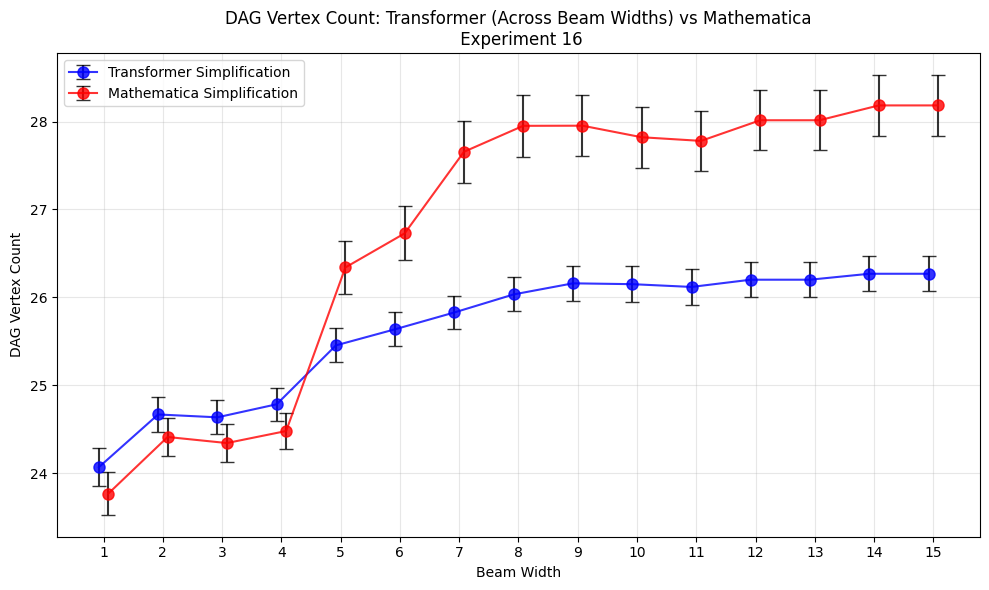

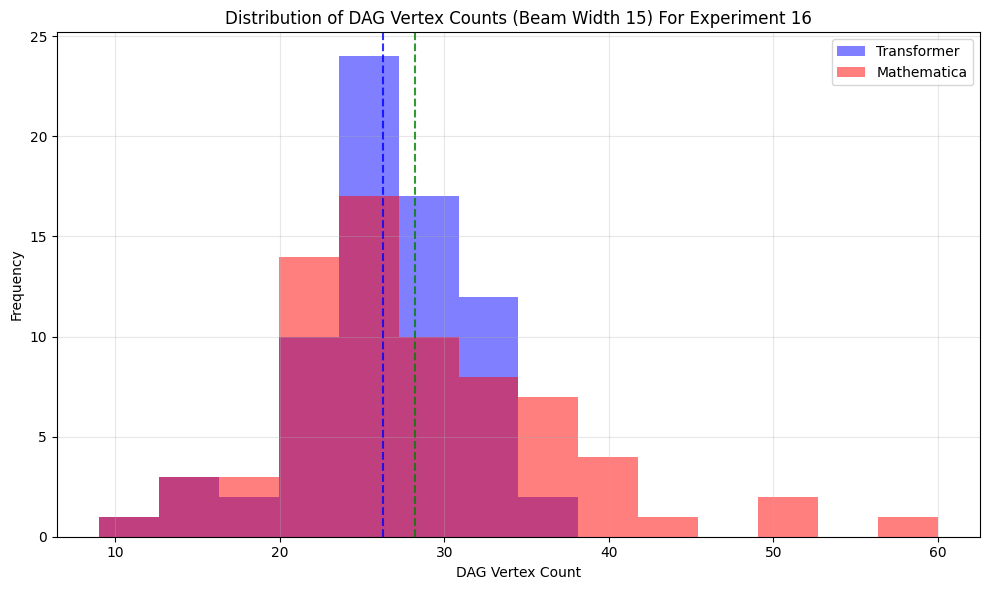

In [48]:
# NOTE : Change for each experiment
exp_num = 16
# NOTE : Change for each experiment
file_path = "data/data8_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp16_beam_width_results = {
1 : [36, 75, 167, 171, 207, 228, 231, 285, 308, 314, 355, 369, 372, 503, 602, 671, 725, 744, 753, 797, 802, 866, 924, 955, 980, 1015, 1043, 1086, 1150, 1166],
2 : [36, 75, 166, 167, 171, 207, 228, 230, 231, 285, 291, 308, 314, 355, 369, 372, 445, 500, 503, 601, 602, 671, 700, 725, 744, 753, 797, 802, 866, 924, 955, 980, 1015, 1043, 1061, 1086, 1096, 1150, 1166],
3 : [36, 75, 166, 167, 171, 207, 228, 230, 231, 285, 291, 308, 314, 355, 369, 372, 445, 500, 503, 601, 602, 671, 673, 700, 725, 744, 753, 797, 802, 866, 924, 955, 980, 1015, 1034, 1043, 1061, 1086, 1096, 1150, 1166],
4 : [36, 75, 166, 167, 171, 207, 228, 230, 231, 285, 291, 308, 314, 343, 355, 369, 372, 445, 456, 500, 503, 601, 602, 623, 671, 673, 700, 725, 744, 753, 797, 802, 810, 866, 924, 955, 980, 1015, 1034, 1043, 1061, 1086, 1096, 1150, 1166, 1190],
5 : [36, 75, 119, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 369, 372, 445, 456, 500, 503, 512, 601, 602, 623, 671, 673, 700, 725, 744, 753, 797, 802, 810, 849, 866, 924, 955, 980, 986, 1015, 1034, 1043, 1061, 1086, 1089, 1096, 1150, 1166, 1190],
6 : [36, 75, 119, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 369, 372, 445, 456, 500, 503, 512, 573, 601, 602, 623, 671, 673, 700, 725, 744, 753, 789, 797, 802, 810, 849, 866, 924, 955, 980, 986, 1015, 1034, 1043, 1061, 1086, 1089, 1096, 1150, 1166, 1190],
7 : [36, 75, 119, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 369, 372, 445, 456, 500, 503, 512, 573, 601, 602, 623, 671, 673, 700, 707, 725, 731, 744, 753, 789, 797, 802, 810, 849, 866, 924, 955, 980, 986, 1015, 1034, 1043, 1061, 1086, 1089, 1096, 1150, 1166, 1190],
8 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 369, 372, 445, 456, 500, 503, 509, 512, 573, 601, 602, 623, 671, 673, 700, 707, 725, 731, 744, 753, 789, 797, 802, 810, 849, 866, 924, 955, 980, 986, 1015, 1034, 1043, 1061, 1086, 1089, 1096, 1128, 1150, 1166, 1190],
9 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 369, 372, 445, 456, 500, 503, 509, 512, 573, 601, 602, 623, 671, 673, 700, 707, 725, 731, 744, 753, 789, 797, 802, 810, 849, 866, 900, 924, 955, 980, 986, 1015, 1034, 1043, 1044, 1061, 1086, 1089, 1096, 1128, 1150, 1166, 1190],
10 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 365, 369, 372, 445, 456, 500, 503, 509, 512, 573, 601, 602, 615, 623, 671, 673, 700, 707, 725, 731, 744, 753, 789, 797, 802, 810, 849, 866, 900, 924, 955, 980, 986, 1015, 1034, 1043, 1044, 1061, 1081, 1086, 1089, 1095, 1096, 1128, 1150, 1166, 1190],
11 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 365, 369, 372, 445, 456, 500, 503, 509, 512, 573, 601, 602, 615, 623, 671, 673, 700, 707, 725, 731, 744, 753, 762, 789, 797, 802, 810, 849, 866, 900, 924, 955, 980, 986, 1015, 1034, 1043, 1044, 1061, 1081, 1086, 1089, 1095, 1096, 1128, 1150, 1166, 1190],
12 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 365, 369, 372, 404, 445, 456, 500, 503, 509, 512, 573, 601, 602, 615, 623, 671, 673, 700, 707, 725, 731, 744, 753, 762, 789, 797, 802, 810, 849, 866, 900, 924, 955, 980, 986, 1015, 1034, 1043, 1044, 1061, 1081, 1086, 1089, 1095, 1096, 1102, 1128, 1150, 1166, 1190],
13 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 365, 369, 372, 404, 445, 456, 500, 503, 509, 512, 573, 601, 602, 615, 623, 671, 673, 700, 707, 725, 731, 744, 753, 762, 789, 797, 802, 810, 849, 866, 900, 924, 955, 980, 986, 1015, 1034, 1043, 1044, 1061, 1081, 1086, 1089, 1095, 1096, 1102, 1128, 1150, 1166, 1190],
14 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 365, 369, 372, 404, 427, 445, 456, 500, 503, 509, 512, 573, 601, 602, 615, 623, 671, 673, 700, 707, 725, 731, 744, 753, 762, 789, 797, 802, 810, 849, 866, 900, 924, 955, 980, 986, 1015, 1034, 1043, 1044, 1061, 1081, 1086, 1089, 1095, 1096, 1102, 1128, 1150, 1166, 1190],
15 : [36, 75, 119, 146, 156, 166, 167, 171, 207, 228, 230, 231, 249, 285, 291, 301, 308, 314, 343, 355, 365, 369, 372, 404, 427, 445, 456, 500, 503, 509, 512, 573, 601, 602, 615, 623, 671, 673, 700, 707, 725, 731, 744, 753, 762, 789, 797, 802, 810, 849, 866, 900, 924, 955, 980, 986, 1015, 1034, 1043, 1044, 1061, 1081, 1086, 1089, 1095, 1096, 1102, 1128, 1150, 1166, 1190]
}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp16_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'transformer_se': np.std(transformer_leafcount) / np.sqrt(n_samples),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'mma_se': np.std(mma_leafcount) / np.sqrt(n_samples),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
transformer_ses = [stats['transformer_se'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]
mma_ses = [stats['mma_se'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(beam_widths))

# Define a small offset for dots
offset = 0.08

# Create dot plots with lines and error bars
plt.errorbar(index - offset, transformer_means,
            yerr=transformer_ses,
            label='Transformer Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='blue',
            ecolor='black',
            alpha=0.8,
            markersize=8)

plt.errorbar(index + offset, mma_means,
            yerr=mma_ses,
            label='Mathematica Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='red',
            ecolor='black',
            alpha=0.8,
            markersize=8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('DAG Vertex Count')
plt.title(f'DAG Vertex Count: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
# for i, v in enumerate(transformer_means):
#     plt.text(i - bar_width/2, v + transformer_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')
# for i, v in enumerate(mma_means):
#     plt.text(i + bar_width/2, v + mma_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp16_beam_width_results[15])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 15)  # Create 15 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='blue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='red')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('DAG Vertex Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of DAG Vertex Counts (Beam Width 15) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer vertex count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica vertex count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in vertex count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


In [49]:
file_path = "data/data8_test_DAG_large.txt"
test_cases = read_test_cases(file_path)

file_path = "data/data8_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

for beam_width, correct_indices in exp16_beam_width_results.items():
    res = find_top_differences(test_cases_leafcount, correct_indices, test_cases)
    print("Exp 16")
    print(f"Beam Width : {beam_width}")
    print(f"1 (Difference : {res[0][1]}) : {res[0][2]}")
    print(f"2 (Difference : {res[1][1]}) : {res[1][2]}")
    print(f"3 (Difference : {res[2][1]}) : {res[2][2]}")

Exp 16
Beam Width : 1
1 (Difference : 9) : + * P 2 * ^ a0 P 3 ^ a1 P 6 + * N 1 2 5 ^ a1 P 9 + * P 1 5 0 * a0 * ^ a1 P 7 a2 + * N 6 0 * ^ a0 P 2 * ^ a1 P 5 ^ a2 P 2 + * P 8 * ^ a0 P 3 * ^ a1 P 3 ^ a2 P 3 + * N 7 5 * ^ a1 P 6 ^ a2 P 3 + * P 6 0 * a0 * ^ a1 P 4 ^ a2 P 4 + * N 1 2 * ^ a0 P 2 * ^ a1 P 2 ^ a2 P 5 + * N 1 5 * ^ a1 P 3 ^ a2 P 6 + * P 6 * a0 * a1 ^ a2 P 7 * N 1 ^ a2 P 9 ? + ^ b2 P 3 * P 2 ^ b3 P 3 & * N 2 ^ a0 P 3 & + * N 2 * ^ a0 P 2 a1 + * N 4 * ^ a1 P 2 a2 * a0 ^ a2 P 2 & + * N 5 ^ a1 P 3 + * P 2 * a0 * a1 a2 * N 1 ^ a2 P 3 & * a0 ^ a1 P 2
2 (Difference : 7) : + * N 3 2 * ^ a0 P 5 * a1 ^ a2 P 3 + * N 1 6 * ^ a0 P 3 * ^ a1 P 3 ^ a2 P 3 + * N 8 0 * ^ a0 P 4 ^ a2 P 5 + * N 1 2 0 * ^ a0 P 2 * ^ a1 P 2 ^ a2 P 5 + * N 3 0 0 * a0 * a1 ^ a2 P 7 * N 2 5 0 ^ a2 P 9 ? + * N 4 * ^ b1 P 2 b3 * N 2 ^ b3 P 3 & * P 5 * ^ a0 P 2 a1 & * P 2 * ^ a0 P 2 a2 & + * N 1 ^ a0 P 3 + * P 4 * ^ a0 P 2 a2 * N 4 * a0 * a1 a2 & + * P 2 * a0 * a1 a2 * P 5 ^ a2 P 3
3 (Difference : 6) : + * P 4 * ^ a0 P 3 * 

# Exp 14 Vertex Count (Transformer vs. MMA)

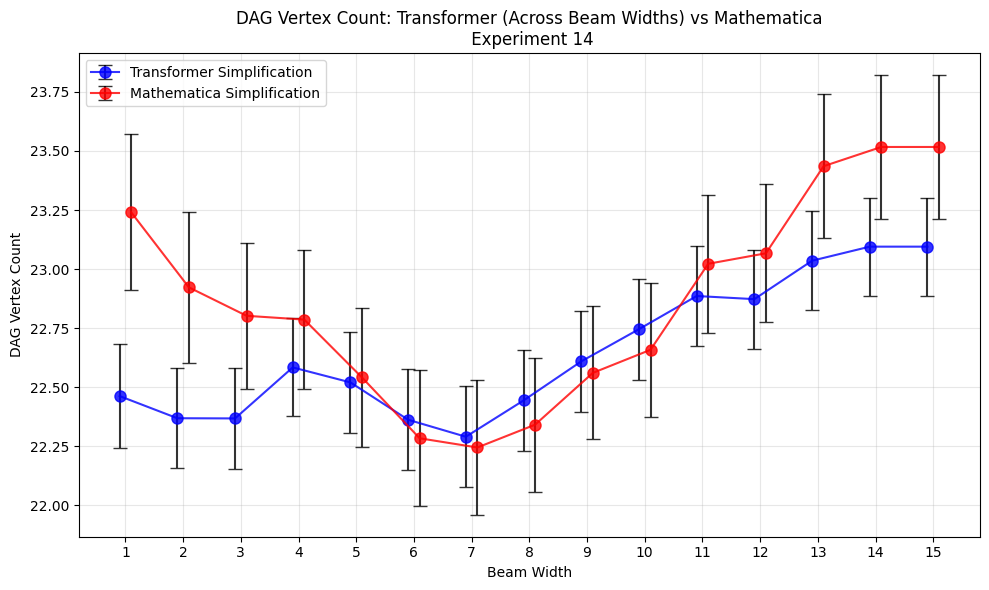

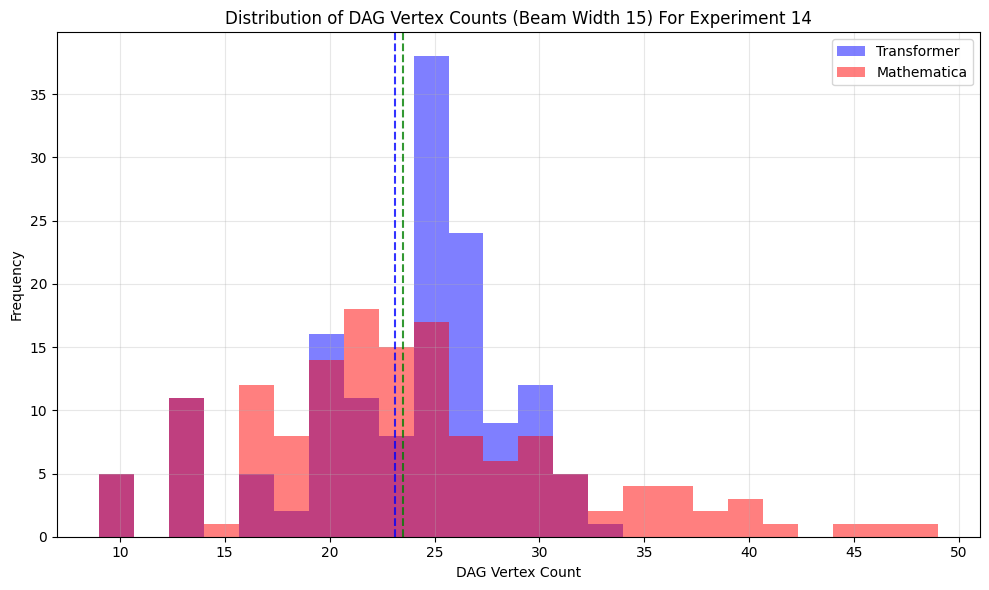

In [50]:
# NOTE : Change for each experiment
exp_num = 14
# NOTE : Change for each experiment
file_path = "data/data6_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp14_beam_width_results = {
1 : [93, 135, 186, 222, 243, 263, 288, 310, 318, 349, 355, 369, 387, 428, 460, 477, 487, 498, 505, 566, 617, 619, 625, 631, 641, 646, 654, 664, 665, 706, 757, 780, 799, 802, 811, 833, 848, 850, 854, 875, 880, 908, 944, 957, 965, 995, 1018, 1056, 1082, 1112, 1134, 1146, 1149, 1156],
2 : [28, 93, 135, 172, 186, 222, 243, 263, 275, 283, 288, 310, 318, 349, 355, 369, 387, 422, 428, 460, 477, 487, 498, 505, 530, 566, 617, 619, 625, 631, 641, 646, 654, 664, 665, 706, 752, 757, 765, 780, 799, 802, 811, 833, 835, 848, 850, 854, 875, 880, 908, 944, 957, 965, 995, 1018, 1056, 1068, 1082, 1112, 1125, 1134, 1146, 1149, 1156],
3 : [25, 28, 78, 93, 135, 172, 186, 188, 222, 243, 263, 275, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 428, 460, 477, 487, 498, 505, 530, 566, 587, 603, 617, 619, 625, 631, 641, 646, 654, 664, 665, 699, 706, 724, 752, 757, 765, 766, 780, 799, 802, 811, 833, 835, 848, 850, 854, 875, 880, 908, 944, 957, 965, 995, 1018, 1056, 1068, 1082, 1112, 1125, 1130, 1134, 1146, 1149, 1156],
4 : [15, 25, 28, 48, 78, 93, 135, 172, 186, 188, 211, 222, 243, 263, 275, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 428, 460, 477, 487, 498, 505, 530, 566, 585, 587, 603, 617, 619, 625, 631, 641, 646, 654, 664, 665, 692, 699, 706, 724, 752, 757, 765, 766, 780, 799, 802, 811, 822, 833, 835, 848, 850, 854, 875, 880, 884, 908, 916, 944, 957, 965, 995, 1018, 1021, 1044, 1045, 1056, 1068, 1082, 1108, 1112, 1125, 1130, 1134, 1146, 1149, 1153, 1156],
5 : [15, 25, 28, 48, 51, 71, 78, 93, 135, 172, 186, 188, 211, 222, 243, 263, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 426, 428, 460, 477, 487, 498, 505, 528, 530, 566, 585, 587, 603, 617, 619, 625, 631, 641, 646, 654, 664, 665, 692, 699, 706, 724, 742, 752, 757, 765, 766, 780, 799, 802, 811, 822, 833, 835, 848, 850, 854, 875, 880, 884, 908, 916, 934, 944, 957, 965, 995, 1018, 1021, 1044, 1045, 1056, 1068, 1082, 1108, 1112, 1125, 1130, 1134, 1146, 1149, 1153, 1156],
6 : [15, 25, 28, 48, 51, 71, 78, 93, 135, 143, 172, 186, 188, 211, 222, 243, 263, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 426, 428, 460, 477, 487, 496, 498, 505, 513, 528, 530, 566, 585, 587, 603, 617, 619, 625, 631, 641, 646, 654, 664, 665, 692, 699, 706, 724, 742, 752, 757, 765, 766, 780, 799, 802, 811, 822, 833, 835, 848, 850, 854, 875, 880, 884, 889, 908, 914, 916, 934, 944, 957, 965, 995, 1018, 1021, 1044, 1045, 1056, 1068, 1082, 1108, 1112, 1125, 1130, 1134, 1146, 1148, 1149, 1153, 1156],
7 : [15, 25, 28, 48, 51, 71, 78, 93, 135, 143, 172, 186, 188, 211, 222, 243, 263, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 426, 428, 460, 477, 487, 496, 498, 505, 513, 528, 530, 531, 566, 568, 584, 585, 587, 603, 617, 619, 625, 631, 641, 646, 654, 664, 665, 692, 699, 702, 706, 724, 742, 752, 757, 765, 766, 780, 782, 799, 802, 811, 822, 833, 835, 848, 850, 854, 875, 880, 884, 889, 908, 914, 916, 934, 939, 944, 957, 965, 995, 1018, 1021, 1044, 1045, 1046, 1053, 1056, 1068, 1082, 1108, 1112, 1125, 1130, 1134, 1146, 1148, 1149, 1153, 1156],
8 : [1, 15, 25, 28, 48, 51, 71, 78, 93, 135, 143, 172, 186, 188, 211, 222, 243, 263, 274, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 426, 428, 438, 460, 477, 487, 496, 498, 505, 513, 528, 530, 531, 566, 568, 584, 585, 587, 603, 617, 619, 625, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 742, 752, 754, 757, 765, 766, 768, 780, 782, 799, 802, 811, 822, 833, 835, 848, 850, 854, 875, 880, 884, 889, 908, 914, 916, 934, 939, 944, 957, 965, 995, 1018, 1021, 1044, 1045, 1046, 1053, 1056, 1068, 1082, 1108, 1112, 1125, 1130, 1134, 1146, 1148, 1149, 1153, 1156],
9 : [1, 15, 25, 28, 48, 51, 61, 71, 78, 93, 135, 143, 172, 186, 188, 211, 222, 243, 263, 274, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 426, 428, 438, 460, 477, 487, 496, 498, 505, 513, 528, 530, 531, 566, 568, 584, 585, 587, 603, 608, 617, 619, 625, 627, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 742, 752, 754, 757, 765, 766, 768, 780, 782, 799, 802, 811, 822, 833, 835, 848, 850, 854, 875, 877, 880, 884, 889, 906, 908, 914, 916, 934, 939, 944, 957, 965, 995, 1018, 1021, 1044, 1045, 1046, 1053, 1056, 1068, 1082, 1108, 1112, 1125, 1129, 1130, 1134, 1146, 1148, 1149, 1153, 1156],
10 : [1, 15, 25, 28, 48, 51, 61, 71, 78, 93, 135, 143, 159, 172, 186, 188, 211, 222, 231, 243, 263, 274, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 426, 428, 438, 460, 477, 487, 496, 498, 505, 513, 528, 530, 531, 566, 568, 584, 585, 587, 603, 608, 617, 619, 625, 627, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 742, 752, 754, 757, 765, 766, 768, 780, 782, 799, 802, 811, 822, 833, 835, 848, 850, 854, 875, 877, 880, 884, 889, 906, 908, 914, 916, 934, 939, 944, 957, 965, 995, 1018, 1021, 1044, 1045, 1046, 1053, 1056, 1068, 1082, 1108, 1112, 1125, 1129, 1130, 1134, 1146, 1148, 1149, 1153, 1156, 1167],
11 : [1, 15, 25, 28, 48, 51, 61, 71, 78, 93, 130, 135, 143, 159, 172, 186, 188, 211, 222, 226, 231, 243, 263, 274, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 422, 426, 428, 438, 460, 462, 477, 487, 496, 498, 505, 513, 528, 530, 531, 566, 568, 584, 585, 587, 603, 608, 617, 619, 625, 627, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 742, 752, 754, 757, 765, 766, 768, 780, 782, 799, 802, 806, 811, 822, 833, 835, 848, 850, 854, 869, 875, 877, 880, 884, 889, 906, 908, 914, 916, 934, 939, 944, 957, 965, 995, 1018, 1021, 1030, 1044, 1045, 1046, 1053, 1056, 1068, 1082, 1108, 1112, 1125, 1129, 1130, 1134, 1146, 1148, 1149, 1153, 1156, 1167],
12 : [1, 15, 25, 28, 48, 51, 61, 71, 78, 93, 130, 135, 143, 159, 172, 186, 188, 211, 222, 226, 231, 243, 263, 274, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 387, 392, 408, 422, 426, 428, 438, 460, 462, 477, 487, 496, 498, 505, 513, 528, 530, 531, 566, 568, 584, 585, 587, 603, 608, 617, 619, 625, 627, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 742, 752, 754, 757, 765, 766, 768, 780, 782, 799, 802, 806, 811, 822, 833, 835, 848, 850, 854, 869, 875, 877, 880, 884, 889, 906, 908, 914, 916, 934, 939, 944, 957, 965, 966, 995, 1018, 1021, 1030, 1044, 1045, 1046, 1053, 1056, 1068, 1082, 1108, 1112, 1125, 1129, 1130, 1134, 1146, 1148, 1149, 1153, 1156, 1167],
13 : [1, 15, 25, 28, 48, 51, 61, 71, 78, 93, 112, 130, 135, 143, 159, 172, 186, 188, 211, 222, 226, 231, 243, 263, 274, 275, 279, 283, 288, 310, 318, 349, 355, 364, 369, 382, 387, 392, 408, 422, 426, 428, 438, 460, 462, 477, 487, 496, 498, 505, 513, 528, 530, 531, 566, 568, 584, 585, 587, 603, 608, 617, 619, 625, 627, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 742, 752, 754, 757, 765, 766, 768, 780, 782, 790, 799, 802, 806, 811, 822, 833, 835, 848, 850, 854, 869, 875, 877, 880, 884, 889, 906, 908, 914, 916, 934, 939, 944, 957, 965, 966, 995, 1018, 1021, 1030, 1044, 1045, 1046, 1050, 1053, 1056, 1057, 1068, 1082, 1108, 1112, 1125, 1129, 1130, 1134, 1142, 1146, 1148, 1149, 1153, 1156, 1167],
14 : [1, 15, 25, 28, 48, 51, 61, 71, 78, 93, 112, 130, 135, 143, 159, 161, 172, 186, 188, 211, 222, 226, 231, 243, 263, 274, 275, 279, 283, 288, 310, 318, 334, 349, 355, 364, 369, 382, 387, 392, 408, 422, 426, 428, 438, 460, 462, 477, 487, 496, 498, 505, 513, 528, 530, 531, 565, 566, 568, 584, 585, 587, 603, 608, 617, 619, 625, 627, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 739, 742, 752, 754, 757, 765, 766, 768, 780, 782, 790, 799, 802, 806, 811, 822, 833, 835, 848, 850, 854, 869, 875, 877, 880, 884, 889, 906, 908, 914, 916, 921, 934, 939, 944, 957, 965, 966, 994, 995, 1018, 1021, 1030, 1044, 1045, 1046, 1050, 1053, 1056, 1057, 1068, 1082, 1108, 1112, 1125, 1129, 1130, 1134, 1142, 1146, 1148, 1149, 1153, 1156, 1167, 1174],
15 : [1, 15, 25, 28, 48, 51, 61, 71, 78, 93, 112, 130, 135, 143, 159, 161, 172, 186, 188, 211, 222, 226, 231, 243, 263, 274, 275, 279, 283, 288, 310, 318, 334, 349, 355, 364, 369, 382, 387, 392, 408, 422, 426, 428, 438, 460, 462, 477, 487, 496, 498, 505, 513, 528, 530, 531, 565, 566, 568, 584, 585, 587, 603, 608, 617, 619, 625, 627, 631, 641, 646, 654, 664, 665, 685, 692, 699, 702, 706, 715, 724, 739, 742, 752, 754, 757, 765, 766, 768, 780, 782, 790, 799, 802, 806, 811, 822, 833, 835, 848, 850, 854, 869, 875, 877, 880, 884, 889, 906, 908, 914, 916, 921, 934, 939, 944, 957, 965, 966, 994, 995, 1018, 1021, 1030, 1044, 1045, 1046, 1050, 1053, 1056, 1057, 1068, 1082, 1108, 1112, 1125, 1129, 1130, 1134, 1142, 1146, 1148, 1149, 1153, 1156, 1167, 1174]
}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp14_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'transformer_se': np.std(transformer_leafcount) / np.sqrt(n_samples),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'mma_se': np.std(mma_leafcount) / np.sqrt(n_samples),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
transformer_ses = [stats['transformer_se'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]
mma_ses = [stats['mma_se'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
bar_width = 0.43
index = np.arange(len(beam_widths))
# Define a larger offset for dots to prevent overlapping
offset = 0.1 # increased from 0.08 to space points further apart

# Create dot plots with lines and error bars
plt.errorbar(index - offset, transformer_means,
            yerr=transformer_ses,
            label='Transformer Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='blue',
            ecolor='black',
            alpha=0.8,
            markersize=8)

plt.errorbar(index + offset, mma_means,
            yerr=mma_ses,
            label='Mathematica Simplification',
            fmt='o-',
            capsize=5,
            color='red',
            ecolor='black',
            alpha=0.8,
            markersize=8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('DAG Vertex Count')
plt.title(f'DAG Vertex Count: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
# for i, v in enumerate(transformer_means):
#     plt.text(i - bar_width/2, v + transformer_ses[i], f'{v:.1f}',
#             ha='center', va='bottom', fontsize=8)
# for i, v in enumerate(mma_means):
#     plt.text(i + bar_width/2, v + mma_ses[i], f'{v:.1f}',
#             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp14_beam_width_results[15])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 25)  # Create 25 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='blue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='red')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('DAG Vertex Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of DAG Vertex Counts (Beam Width 15) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer vertex count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica vertex count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in vertex count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


In [51]:
file_path = "data/data6_test_DAG_large.txt"
test_cases = read_test_cases(file_path)

file_path = "data/data6_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

for beam_width, correct_indices in exp14_beam_width_results.items():
    res = find_top_differences(test_cases_leafcount, correct_indices, test_cases)
    print("Exp 14")
    print(f"Beam Width : {beam_width}")
    print(f"1 (Difference : {res[0][1]}) : {res[0][2]}")
    print(f"2 (Difference : {res[1][1]}) : {res[1][2]}")
    print(f"3 (Difference : {res[2][1]}) : {res[2][2]}")

Exp 14
Beam Width : 1
1 (Difference : 20) : + * N 2 5 0 ^ a0 P 9 + * P 6 0 0 * ^ a0 P 8 a1 + * N 4 8 0 * ^ a0 P 7 ^ a1 P 2 + * P 1 5 3 * ^ a0 P 6 ^ a1 P 3 + * P 9 6 0 * ^ a0 P 5 ^ a1 P 4 + * P 1 1 1 6 * ^ a0 P 4 ^ a1 P 5 + * N 4 8 0 * ^ a0 P 3 ^ a1 P 6 + * P 1 5 8 4 * ^ a0 P 2 ^ a1 P 7 * P 1 9 2 ^ a1 P 9 ? + * P 5 ^ b0 P 3 * P 2 ^ b1 P 3 & + * P 5 * ^ a0 P 2 a1 * P 4 ^ a1 P 3 & + * N 5 ^ a0 P 3 + * P 4 * ^ a0 P 2 a1 * N 4 ^ a1 P 3 & * N 5 * ^ a0 P 2 a1
2 (Difference : 18) : + * N 1 9 2 ^ a0 P 9 + * N 2 8 8 * ^ a0 P 8 a1 + * N 1 4 4 * ^ a0 P 7 ^ a1 P 2 + * N 3 1 2 * ^ a0 P 6 ^ a1 P 3 + * N 2 8 8 * ^ a0 P 5 ^ a1 P 4 + * N 7 2 * ^ a0 P 4 ^ a1 P 5 + * N 1 6 8 * ^ a0 P 3 ^ a1 P 6 + * N 7 2 * ^ a0 P 2 ^ a1 P 7 * N 2 4 ^ a1 P 9 ? + * N 3 ^ b1 P 3 * P 3 ^ b2 P 3 & + * P 5 ^ a0 P 3 * N 3 * ^ a0 P 2 a1 & * P 2 * a0 ^ a1 P 2 & + * N 4 ^ a0 P 3 + * N 2 * ^ a0 P 2 a1 * N 2 ^ a1 P 3
3 (Difference : 11) : + * P 9 * ^ a0 P 8 a1 + * P 9 0 * ^ a0 P 7 ^ a1 P 2 + * P 2 2 5 * ^ a0 P 6 ^ a1 P 3 + * N 3 2 0 

# Exp 15 Vertex Count (Transformer vs. MMA)

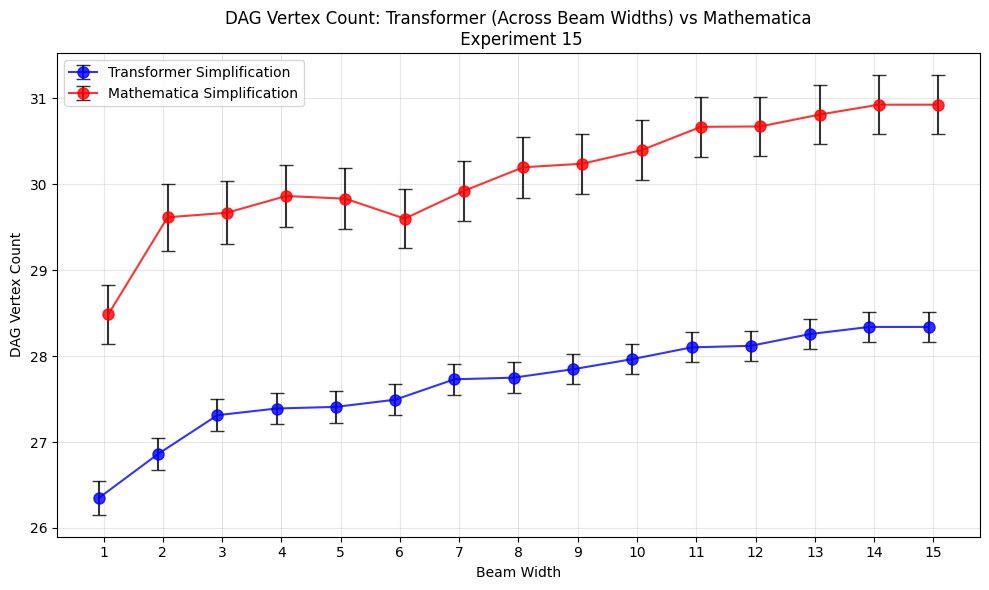

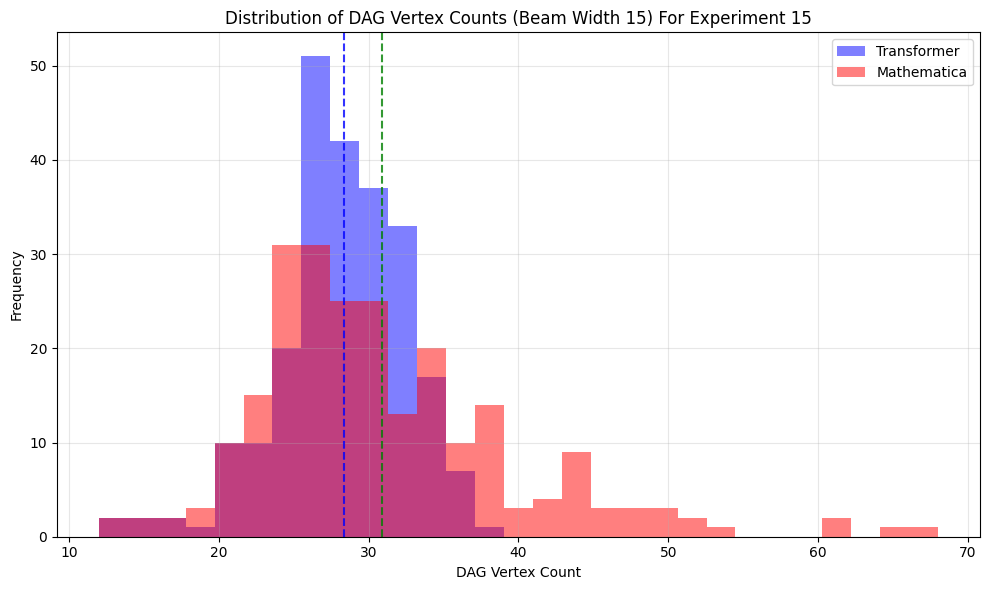

In [52]:
# NOTE : Change for each experiment
exp_num = 15
# NOTE : Change for each experiment
file_path = "data/data7_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

# NOTE : change for each experiment
exp15_beam_width_results = {
1 : [3, 15, 41, 45, 46, 76, 94, 117, 126, 161, 179, 197, 206, 209, 212, 213, 221, 227, 302, 335, 360, 371, 385, 399, 406, 420, 423, 424, 435, 437, 452, 457, 471, 486, 503, 515, 545, 550, 601, 615, 620, 625, 632, 633, 636, 651, 664, 686, 727, 732, 747, 752, 756, 774, 793, 808, 834, 869, 889, 918, 931, 937, 945, 951, 956, 1000, 1006, 1029, 1035, 1061, 1079, 1100, 1101, 1120, 1135, 1138, 1140, 1173, 1175, 1192],
2 : [3, 15, 41, 45, 46, 76, 94, 101, 117, 126, 161, 162, 179, 197, 206, 209, 212, 213, 221, 227, 237, 248, 276, 302, 328, 335, 360, 371, 385, 389, 399, 406, 420, 423, 424, 435, 437, 452, 457, 471, 486, 492, 503, 515, 545, 550, 601, 615, 620, 625, 632, 633, 636, 651, 664, 686, 727, 732, 747, 752, 756, 766, 774, 793, 808, 814, 834, 869, 889, 894, 918, 931, 937, 945, 951, 956, 1000, 1006, 1029, 1035, 1043, 1045, 1061, 1079, 1098, 1100, 1101, 1120, 1135, 1138, 1140, 1173, 1175, 1192],
3 : [3, 15, 37, 41, 45, 46, 76, 94, 95, 101, 117, 126, 134, 147, 161, 162, 179, 197, 206, 209, 212, 213, 221, 227, 237, 248, 276, 302, 328, 335, 360, 371, 385, 389, 399, 406, 420, 423, 424, 435, 437, 452, 457, 466, 470, 471, 473, 486, 492, 499, 503, 515, 527, 545, 550, 600, 601, 604, 615, 617, 620, 625, 629, 632, 633, 636, 651, 664, 686, 727, 732, 747, 752, 756, 766, 774, 793, 808, 814, 834, 837, 838, 864, 869, 889, 894, 897, 918, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1006, 1029, 1035, 1043, 1045, 1059, 1061, 1079, 1098, 1100, 1101, 1120, 1135, 1138, 1140, 1173, 1175, 1192],
4 : [3, 15, 37, 41, 45, 46, 66, 74, 76, 94, 95, 101, 117, 126, 133, 134, 147, 154, 161, 162, 179, 197, 206, 209, 212, 213, 221, 227, 237, 248, 276, 290, 302, 328, 335, 355, 359, 360, 371, 385, 389, 399, 406, 420, 423, 424, 435, 437, 452, 457, 466, 470, 471, 473, 486, 492, 499, 503, 515, 527, 545, 550, 600, 601, 604, 615, 617, 620, 625, 629, 632, 633, 636, 651, 664, 676, 686, 692, 712, 727, 732, 746, 747, 752, 756, 766, 769, 774, 793, 808, 814, 815, 834, 837, 838, 852, 864, 869, 889, 894, 897, 908, 918, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1006, 1029, 1035, 1043, 1045, 1054, 1055, 1059, 1061, 1079, 1098, 1100, 1101, 1118, 1120, 1135, 1138, 1140, 1173, 1175, 1192],
5 : [3, 15, 37, 41, 45, 46, 66, 74, 76, 94, 95, 101, 117, 126, 133, 134, 147, 154, 161, 162, 177, 179, 197, 206, 209, 212, 213, 221, 227, 237, 248, 276, 290, 302, 328, 335, 355, 359, 360, 371, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 448, 452, 457, 466, 470, 471, 473, 486, 492, 499, 501, 503, 515, 527, 539, 545, 550, 555, 600, 601, 604, 615, 617, 620, 625, 629, 632, 633, 636, 651, 664, 676, 686, 687, 692, 695, 712, 727, 732, 746, 747, 752, 756, 766, 769, 774, 793, 795, 808, 814, 815, 822, 834, 837, 838, 852, 864, 869, 876, 889, 894, 897, 908, 918, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1006, 1029, 1035, 1043, 1045, 1054, 1055, 1059, 1061, 1079, 1098, 1100, 1101, 1118, 1120, 1135, 1138, 1140, 1173, 1175, 1192],
6 : [1, 3, 12, 15, 37, 41, 44, 45, 46, 66, 74, 76, 94, 95, 101, 117, 126, 133, 134, 147, 154, 161, 162, 177, 178, 179, 197, 206, 209, 212, 213, 221, 227, 237, 248, 264, 276, 290, 302, 328, 335, 355, 359, 360, 371, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 448, 452, 457, 466, 470, 471, 473, 486, 492, 499, 501, 503, 515, 527, 528, 539, 545, 550, 555, 600, 601, 604, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 692, 695, 712, 727, 732, 746, 747, 752, 756, 766, 769, 774, 786, 793, 795, 807, 808, 814, 815, 822, 834, 837, 838, 852, 864, 869, 876, 889, 894, 897, 908, 918, 927, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1054, 1055, 1059, 1061, 1079, 1098, 1100, 1101, 1118, 1120, 1135, 1138, 1139, 1140, 1145, 1173, 1175, 1183, 1192],
7 : [1, 3, 12, 15, 37, 41, 44, 45, 46, 66, 74, 76, 94, 95, 101, 117, 122, 126, 133, 134, 141, 147, 154, 161, 162, 177, 178, 179, 197, 206, 209, 212, 213, 221, 227, 237, 248, 264, 276, 290, 302, 307, 308, 328, 335, 355, 359, 360, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 448, 452, 457, 466, 470, 471, 473, 486, 492, 499, 501, 503, 515, 527, 528, 539, 545, 550, 555, 600, 601, 604, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 692, 695, 712, 727, 732, 746, 747, 752, 756, 766, 769, 774, 786, 793, 795, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 861, 864, 869, 876, 889, 894, 897, 908, 918, 923, 927, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1054, 1055, 1059, 1061, 1069, 1079, 1098, 1100, 1101, 1118, 1120, 1135, 1138, 1139, 1140, 1145, 1165, 1173, 1175, 1183, 1192],
8 : [1, 3, 12, 15, 37, 41, 44, 45, 46, 66, 74, 76, 94, 95, 101, 117, 122, 126, 133, 134, 141, 147, 154, 161, 162, 177, 178, 179, 197, 206, 209, 212, 213, 221, 227, 237, 248, 264, 276, 290, 302, 307, 308, 328, 335, 344, 353, 355, 359, 360, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 448, 452, 457, 466, 470, 471, 473, 486, 492, 499, 501, 503, 515, 527, 528, 539, 545, 550, 555, 600, 601, 604, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 727, 730, 732, 746, 747, 752, 756, 766, 769, 774, 786, 793, 795, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 861, 864, 869, 876, 889, 894, 897, 908, 918, 923, 927, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1054, 1055, 1059, 1061, 1069, 1079, 1098, 1100, 1101, 1113, 1118, 1120, 1135, 1138, 1139, 1140, 1145, 1165, 1173, 1175, 1183, 1192],
9 : [1, 3, 12, 15, 37, 41, 44, 45, 46, 66, 74, 76, 80, 94, 95, 101, 111, 117, 122, 126, 133, 134, 141, 147, 154, 161, 162, 177, 178, 179, 197, 205, 206, 209, 212, 213, 221, 227, 237, 248, 264, 276, 290, 302, 307, 308, 328, 335, 344, 353, 355, 359, 360, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 448, 452, 455, 457, 466, 470, 471, 473, 486, 492, 499, 501, 503, 515, 527, 528, 539, 545, 550, 555, 600, 601, 603, 604, 605, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 727, 730, 732, 746, 747, 752, 756, 766, 769, 774, 786, 793, 795, 799, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 855, 860, 861, 864, 869, 876, 878, 884, 889, 894, 897, 908, 910, 918, 923, 927, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1051, 1054, 1055, 1059, 1061, 1069, 1079, 1090, 1098, 1100, 1101, 1113, 1118, 1120, 1133, 1135, 1138, 1139, 1140, 1145, 1165, 1173, 1175, 1183, 1192],
10 : [1, 3, 12, 15, 37, 41, 44, 45, 46, 66, 74, 76, 80, 94, 95, 101, 111, 117, 122, 126, 127, 133, 134, 141, 147, 154, 161, 162, 177, 178, 179, 195, 197, 205, 206, 209, 212, 213, 221, 227, 234, 237, 248, 264, 276, 290, 302, 307, 308, 328, 329, 335, 344, 353, 355, 359, 360, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 439, 441, 448, 452, 455, 457, 466, 470, 471, 473, 486, 492, 497, 499, 501, 503, 515, 527, 528, 539, 541, 545, 550, 555, 600, 601, 603, 604, 605, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 727, 730, 732, 743, 746, 747, 752, 756, 766, 769, 774, 779, 786, 793, 795, 799, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 855, 860, 861, 864, 869, 876, 878, 884, 889, 894, 897, 908, 910, 918, 923, 927, 929, 931, 937, 945, 951, 953, 956, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1051, 1054, 1055, 1059, 1061, 1069, 1073, 1079, 1090, 1098, 1100, 1101, 1108, 1113, 1118, 1120, 1133, 1135, 1138, 1139, 1140, 1145, 1165, 1173, 1175, 1183, 1192],
11 : [1, 3, 12, 15, 37, 41, 44, 45, 46, 63, 66, 74, 76, 80, 94, 95, 101, 111, 117, 122, 124, 126, 127, 133, 134, 135, 141, 147, 154, 161, 162, 177, 178, 179, 195, 197, 205, 206, 209, 212, 213, 221, 227, 234, 237, 248, 264, 276, 290, 302, 307, 308, 328, 329, 335, 344, 353, 355, 359, 360, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 439, 441, 448, 452, 455, 457, 466, 470, 471, 473, 486, 492, 494, 497, 499, 501, 503, 515, 527, 528, 539, 541, 545, 550, 555, 561, 585, 600, 601, 603, 604, 605, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 727, 730, 732, 743, 746, 747, 752, 756, 766, 769, 773, 774, 779, 786, 793, 795, 799, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 855, 860, 861, 864, 869, 876, 878, 884, 889, 893, 894, 897, 898, 901, 908, 910, 918, 923, 927, 929, 931, 937, 945, 951, 953, 956, 964, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1051, 1054, 1055, 1059, 1061, 1069, 1073, 1079, 1090, 1098, 1100, 1101, 1108, 1113, 1118, 1120, 1133, 1135, 1138, 1139, 1140, 1145, 1165, 1168, 1173, 1175, 1183, 1192],
12 : [1, 3, 12, 15, 37, 41, 44, 45, 46, 63, 66, 74, 76, 80, 94, 95, 98, 101, 111, 117, 122, 124, 126, 127, 133, 134, 135, 141, 147, 154, 161, 162, 177, 178, 179, 195, 197, 205, 206, 209, 212, 213, 221, 227, 234, 237, 248, 264, 276, 290, 302, 307, 308, 328, 329, 335, 344, 353, 355, 359, 360, 362, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 439, 441, 448, 452, 455, 457, 466, 470, 471, 473, 486, 492, 494, 497, 499, 501, 503, 515, 527, 528, 539, 541, 545, 550, 555, 561, 585, 592, 600, 601, 603, 604, 605, 614, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 721, 727, 730, 732, 743, 746, 747, 752, 756, 766, 769, 773, 774, 779, 786, 793, 795, 799, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 855, 860, 861, 864, 869, 876, 878, 884, 889, 893, 894, 897, 898, 901, 908, 910, 918, 923, 926, 927, 929, 931, 937, 945, 951, 953, 956, 964, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1051, 1054, 1055, 1059, 1061, 1069, 1073, 1079, 1090, 1098, 1100, 1101, 1108, 1113, 1118, 1120, 1133, 1135, 1138, 1139, 1140, 1144, 1145, 1150, 1165, 1168, 1170, 1173, 1175, 1183, 1192],
13 : [1, 3, 12, 15, 37, 39, 41, 44, 45, 46, 63, 66, 74, 76, 80, 94, 95, 98, 101, 111, 117, 122, 124, 126, 127, 133, 134, 135, 140, 141, 147, 154, 161, 162, 177, 178, 179, 195, 197, 205, 206, 209, 212, 213, 220, 221, 227, 234, 237, 248, 264, 276, 290, 302, 307, 308, 328, 329, 335, 344, 353, 355, 359, 360, 362, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 439, 441, 448, 452, 455, 457, 466, 470, 471, 473, 486, 492, 494, 497, 499, 501, 503, 515, 527, 528, 539, 541, 545, 550, 555, 561, 585, 592, 600, 601, 603, 604, 605, 614, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 721, 727, 730, 732, 743, 746, 747, 752, 755, 756, 766, 769, 773, 774, 779, 786, 793, 795, 799, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 855, 860, 861, 864, 869, 876, 878, 884, 889, 893, 894, 897, 898, 901, 908, 910, 918, 923, 926, 927, 929, 931, 937, 945, 951, 953, 956, 964, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1051, 1054, 1055, 1059, 1061, 1069, 1073, 1079, 1090, 1098, 1100, 1101, 1108, 1113, 1118, 1120, 1133, 1135, 1138, 1139, 1140, 1144, 1145, 1150, 1161, 1165, 1168, 1170, 1173, 1175, 1183, 1192],
14 : [1, 3, 12, 15, 37, 39, 41, 44, 45, 46, 53, 62, 63, 66, 74, 76, 80, 94, 95, 98, 101, 111, 117, 122, 124, 126, 127, 133, 134, 135, 140, 141, 147, 154, 161, 162, 177, 178, 179, 195, 197, 205, 206, 209, 212, 213, 220, 221, 227, 234, 237, 248, 264, 276, 290, 302, 307, 308, 327, 328, 329, 335, 344, 353, 355, 359, 360, 362, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 439, 441, 448, 452, 455, 457, 466, 469, 470, 471, 473, 486, 492, 494, 497, 499, 501, 503, 515, 527, 528, 539, 541, 545, 550, 555, 561, 585, 592, 600, 601, 603, 604, 605, 614, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 721, 727, 730, 732, 743, 746, 747, 752, 755, 756, 766, 769, 773, 774, 779, 786, 793, 795, 799, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 855, 860, 861, 864, 869, 874, 876, 878, 884, 889, 893, 894, 897, 898, 901, 908, 910, 918, 923, 926, 927, 929, 931, 937, 945, 951, 953, 956, 964, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1051, 1054, 1055, 1059, 1061, 1069, 1073, 1079, 1090, 1098, 1100, 1101, 1108, 1113, 1118, 1120, 1133, 1135, 1138, 1139, 1140, 1144, 1145, 1150, 1161, 1165, 1168, 1170, 1173, 1175, 1183, 1187, 1192],
15 : [1, 3, 12, 15, 37, 39, 41, 44, 45, 46, 53, 62, 63, 66, 74, 76, 80, 94, 95, 98, 101, 111, 117, 122, 124, 126, 127, 133, 134, 135, 140, 141, 147, 154, 161, 162, 177, 178, 179, 195, 197, 205, 206, 209, 212, 213, 220, 221, 227, 234, 237, 248, 264, 276, 290, 302, 307, 308, 327, 328, 329, 335, 344, 353, 355, 359, 360, 362, 371, 372, 380, 385, 389, 399, 406, 420, 421, 423, 424, 435, 437, 439, 441, 448, 452, 455, 457, 466, 469, 470, 471, 473, 486, 492, 494, 497, 499, 501, 503, 515, 527, 528, 539, 541, 545, 550, 555, 561, 585, 592, 600, 601, 603, 604, 605, 614, 615, 617, 620, 625, 626, 629, 632, 633, 636, 651, 664, 676, 686, 687, 688, 692, 695, 712, 721, 727, 730, 732, 743, 746, 747, 752, 755, 756, 766, 769, 773, 774, 779, 786, 793, 795, 799, 806, 807, 808, 814, 815, 816, 822, 834, 837, 838, 852, 855, 860, 861, 864, 869, 874, 876, 878, 884, 889, 893, 894, 897, 898, 901, 908, 910, 918, 923, 926, 927, 929, 931, 937, 945, 951, 953, 956, 964, 973, 1000, 1002, 1006, 1029, 1035, 1043, 1045, 1048, 1051, 1054, 1055, 1059, 1061, 1069, 1073, 1079, 1090, 1098, 1100, 1101, 1108, 1113, 1118, 1120, 1133, 1135, 1138, 1139, 1140, 1144, 1145, 1150, 1161, 1165, 1168, 1170, 1173, 1175, 1183, 1187, 1192]
}

beam_stats = {}

# NOTE : Change for each experiement
for beam_width, correct_indices in exp15_beam_width_results.items():
    correct_cases = get_correct_cases(test_cases_leafcount, correct_indices)
    transformer_leafcount, mma_leafcount = parse_beam_numbers(correct_cases)

    differences = np.array(transformer_leafcount) - np.array(mma_leafcount)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    beam_stats[beam_width] = {
        'transformer_mean': np.mean(transformer_leafcount),
        'transformer_std': np.std(transformer_leafcount),
        'transformer_se': np.std(transformer_leafcount) / np.sqrt(n_samples),
        'mma_mean': np.mean(mma_leafcount),
        'mma_std': np.std(mma_leafcount),
        'mma_se': np.std(mma_leafcount) / np.sqrt(n_samples),
        'difference_mean': mean_diff,
        'difference_std': std_diff
    }

# Plotting
beam_widths = list(beam_stats.keys())
transformer_means = [stats['transformer_mean'] for stats in beam_stats.values()]
transformer_stds = [stats['transformer_std'] for stats in beam_stats.values()]
transformer_ses = [stats['transformer_se'] for stats in beam_stats.values()]
mma_means = [stats['mma_mean'] for stats in beam_stats.values()]
mma_stds = [stats['mma_std'] for stats in beam_stats.values()]
mma_ses = [stats['mma_se'] for stats in beam_stats.values()]

# Set up the plot
plt.figure(figsize=(10, 6))
offset = 0.08
index = np.arange(len(beam_widths))

# Create dot plots with lines and error bars
plt.errorbar(index - offset, transformer_means,
            yerr=transformer_ses,
            label='Transformer Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='blue',
            ecolor='black',
            alpha=0.8,
            markersize=8)

plt.errorbar(index + offset, mma_means,
            yerr=mma_ses,
            label='Mathematica Simplification',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='red',
            ecolor='black',
            alpha=0.8,
            markersize=8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('DAG Vertex Count')
plt.title(f'DAG Vertex Count: Transformer (Across Beam Widths) vs Mathematica\n Experiment {exp_num}')
plt.xticks(index, beam_widths)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
# for i, v in enumerate(transformer_means):
#     plt.text(i - bar_width/2, v + transformer_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')
# for i, v in enumerate(mma_means):
#     plt.text(i + bar_width/2, v + mma_ses[i], f'{v:.1f}',
#             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create distribution histogram for beam width 50
plt.figure(figsize=(10, 6))

# Get correct cases for beam width 50
correct_cases_50 = get_correct_cases(test_cases_leafcount, exp15_beam_width_results[15])
transformer_leafcount_50, mma_leafcount_50 = parse_beam_numbers(correct_cases_50)

# Calculate common bins
min_val = min(min(transformer_leafcount_50), min(mma_leafcount_50))
max_val = max(max(transformer_leafcount_50), max(mma_leafcount_50))
bins = np.linspace(min_val, max_val, 30)  # Create 40 equally spaced bins

# Create histogram with transparency and common bins
plt.hist(transformer_leafcount_50, bins=bins, alpha=0.5, label='Transformer', color='blue')
plt.hist(mma_leafcount_50, bins=bins, alpha=0.5, label='Mathematica', color='red')

# Add vertical lines for means
plt.axvline(np.mean(transformer_leafcount_50), color='blue', linestyle='--', alpha=0.8)
plt.axvline(np.mean(mma_leafcount_50), color='green', linestyle='--', alpha=0.8)

# Customize the plot
plt.xlabel('DAG Vertex Count')
plt.ylabel('Frequency')
plt.title(f'Distribution of DAG Vertex Counts (Beam Width 15) For Experiment {exp_num}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
# print("\nDetailed Polynomial Simplification Statistics:")
# print("-" * 60)
# for beam_width, stats in beam_stats.items():
#     print(f"\nBeam Width {beam_width}:")
#     print(f"Transformer vertex count: {stats['transformer_mean']:.2f} ± {stats['transformer_std']:.2f}")
#     print(f"Mathematica vertex count: {stats['mma_mean']:.2f} ± {stats['mma_std']:.2f}")
#     print(f"Difference in vertex count: {stats['difference_mean']:.2f} ± {stats['difference_std']:.2f}")


In [53]:
file_path = "data/data7_test_DAG_large.txt"
test_cases = read_test_cases(file_path)

file_path = "data/data7_test_DAG_leafcount_large.txt"
test_cases_leafcount = read_test_cases(file_path)

for beam_width, correct_indices in exp15_beam_width_results.items():
    res = find_top_differences(test_cases_leafcount, correct_indices, test_cases)
    print("Exp 15")
    print(f"Beam Width : {beam_width}")
    print(f"1 (Difference : {res[0][1]}) : {res[0][2]}")
    print(f"2 (Difference : {res[1][1]}) : {res[1][2]}")
    print(f"3 (Difference : {res[2][1]}) : {res[2][2]}")

Exp 15
Beam Width : 1
1 (Difference : 37) : + * P 1 2 8 ^ a1 P 9 + * N 3 0 0 * ^ a0 P 2 * ^ a1 P 5 ^ a2 P 2 + * P 3 6 0 * a0 * ^ a1 P 6 ^ a2 P 2 + * N 1 0 8 * ^ a1 P 7 ^ a2 P 2 + * N 3 7 5 * ^ a0 P 3 * ^ a1 P 3 ^ a2 P 3 + * P 6 7 5 * ^ a0 P 2 * ^ a1 P 4 ^ a2 P 3 + * N 4 0 5 * a0 * ^ a1 P 5 ^ a2 P 3 + * P 8 1 * ^ a1 P 6 ^ a2 P 3 + * N 2 8 8 * ^ a1 P 7 * a2 a3 + * P 2 2 5 * ^ a0 P 2 * ^ a1 P 3 * ^ a2 P 3 a3 + * N 2 7 0 * a0 * ^ a1 P 4 * ^ a2 P 3 a3 + * P 8 1 * ^ a1 P 5 * ^ a2 P 3 a3 + * P 2 1 6 * ^ a1 P 5 * ^ a2 P 2 ^ a3 P 2 * N 5 4 * ^ a1 P 3 * ^ a2 P 3 ^ a3 P 3 ? + * N 3 ^ b1 P 3 + * P 3 * ^ b1 P 2 b2 * N 2 ^ b2 P 3 & * N 2 ^ a3 P 3 & + * P 5 * a0 * a1 a2 * N 3 * ^ a1 P 2 a2 & + * N 4 ^ a1 P 3 * P 3 * a1 * a2 a3
2 (Difference : 16) : + * N 6 4 * ^ a1 P 3 ^ a2 P 6 + * N 2 4 0 * ^ a0 P 2 * ^ a1 P 2 * ^ a2 P 4 a3 + * N 6 4 * ^ a1 P 2 * ^ a2 P 6 a3 + * N 3 0 0 * ^ a0 P 4 * a1 * ^ a2 P 2 ^ a3 P 2 + * N 1 6 0 * ^ a0 P 2 * a1 * ^ a2 P 4 ^ a3 P 2 + * N 1 2 5 * ^ a0 P 6 ^ a3 P 3 + * N 1 0 0 * ^

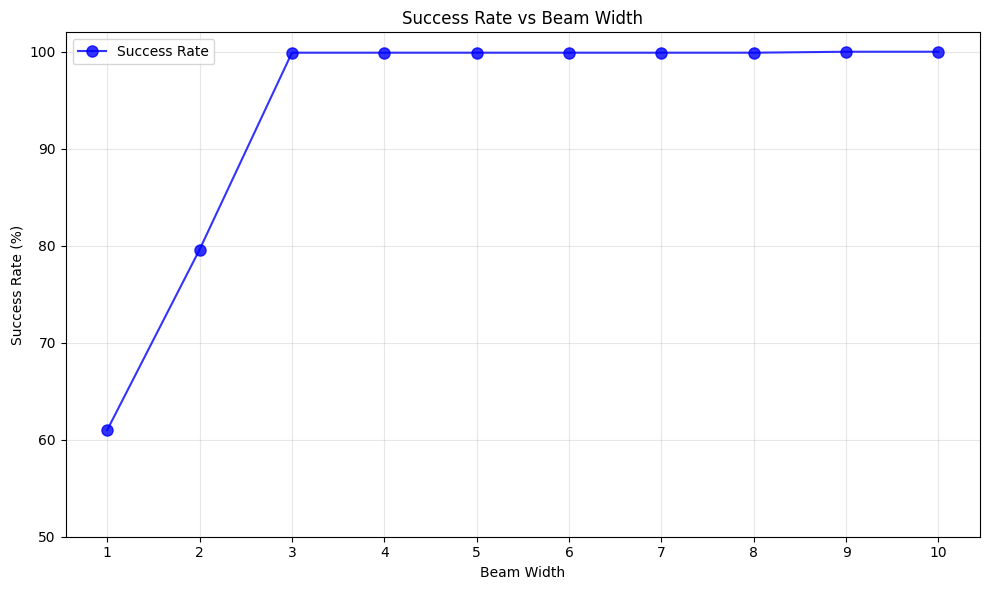

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Data
beam_widths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
success_rates = [61.00, 79.60, 99.90, 99.90, 99.90, 99.90, 99.90, 99.90, 100.00, 100.00]

# Set up the plot
plt.figure(figsize=(10, 6))
index = np.arange(len(beam_widths))

# Create dot plot with lines and error bars
plt.errorbar(index, success_rates,
            yerr=None,  # No error bars needed for this data
            label='Success Rate',
            fmt='o-',  # dots connected by lines
            capsize=5,
            color='blue',
            ecolor='black',
            alpha=0.8,
            markersize=8)

# Customize the plot
plt.xlabel('Beam Width')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate vs Beam Width')
plt.xticks(index, beam_widths)
plt.ylim(50, 102)  # Set y-axis limits to start at 50 for better visibility
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on top of points
# for i, v in enumerate(success_rates):
#     plt.text(i, v + 0.5, f'{v:.1f}%',
#             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()